In [1]:
from gm_age_relation import (GM_Age_GALAH, KM_metals, 
                             compare_all_spec_surveys)

To create the Gaussian Mixture Models used to determine age distributions, the files `GALAH_DR3_main_allstar_v2.fits`, `GALAH_DR3_VAC_ages_v2.fits` and `GALAH_DR3_VAC_GaiaEDR3_v2.fits` need to be in the directory indicated when initializing the `GM_Age_GALAH` object. These files can be downloaded __[here](https://cloud.datacentral.org.au/teamdata/GALAH/public/GALAH_DR3/)__.

In [2]:
# initialze the GALAH training

GM = GM_Age_GALAH('galah_data/')

/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['zgal_gaia'][cat['zgal_gaia'] < -1000] = np.nan

/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:583: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['UVel_gaia'][cat['UVel_gaia'] < -1000] = np.nan

/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:584: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat

100%|██████████| 100/100 [00:00<00:00, 3158.86it/s]


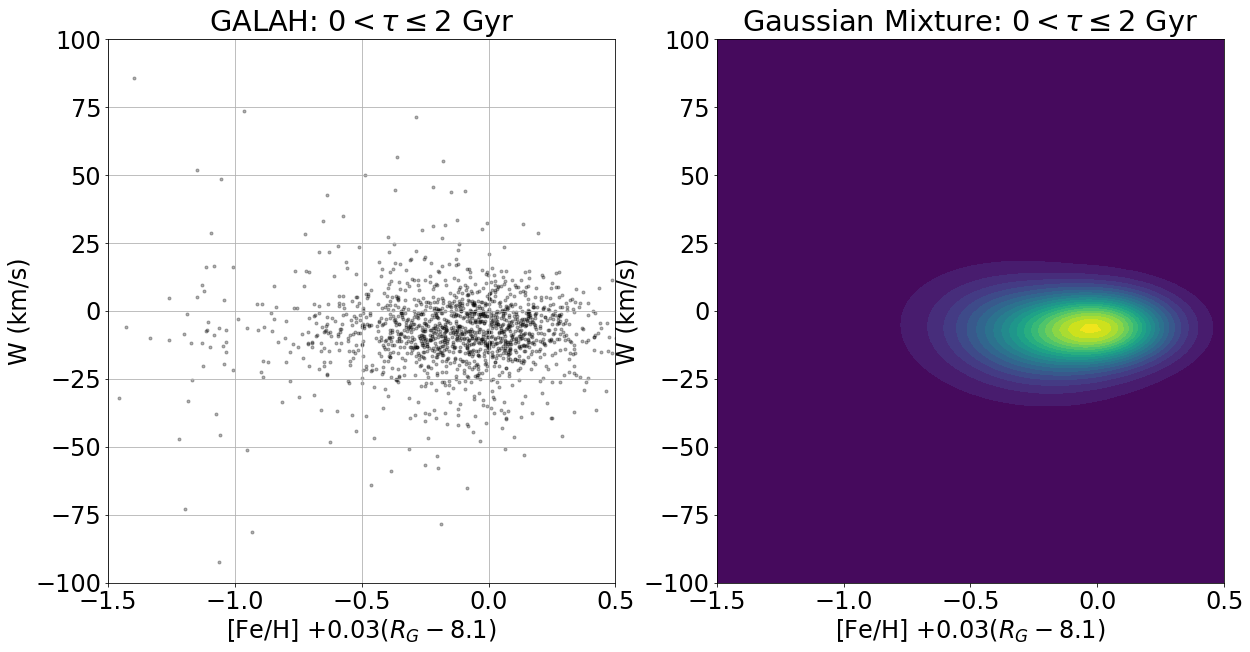

100%|██████████| 100/100 [00:00<00:00, 1495.80it/s]


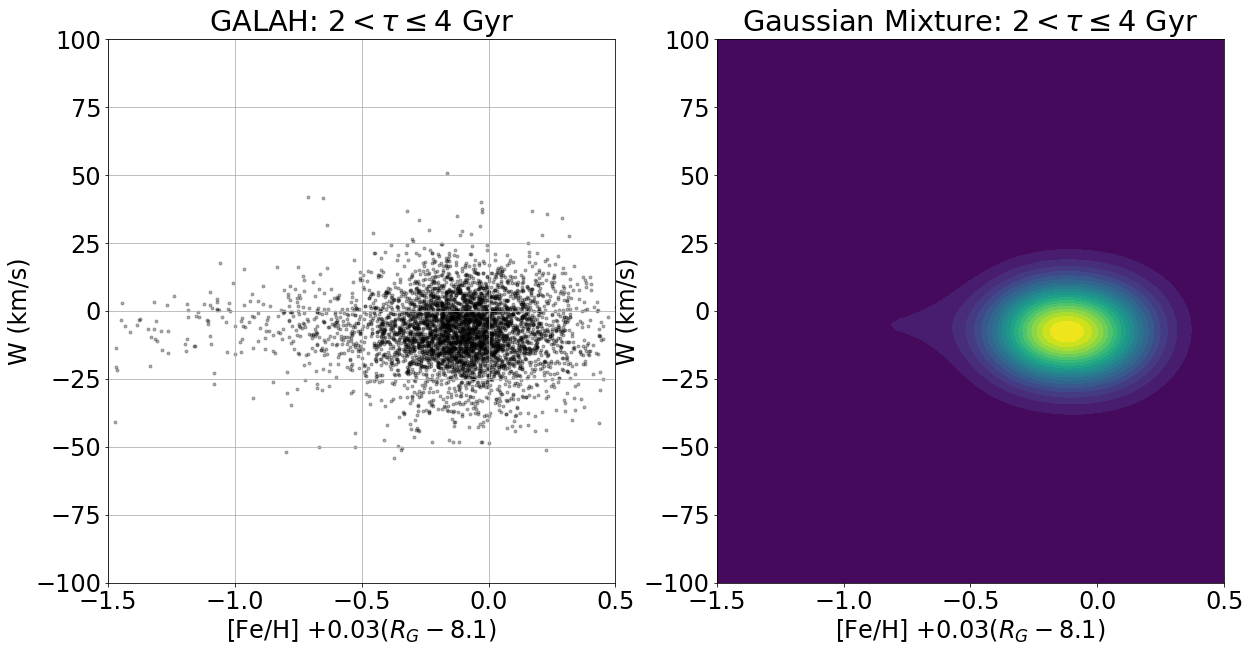

100%|██████████| 100/100 [00:00<00:00, 2334.92it/s]


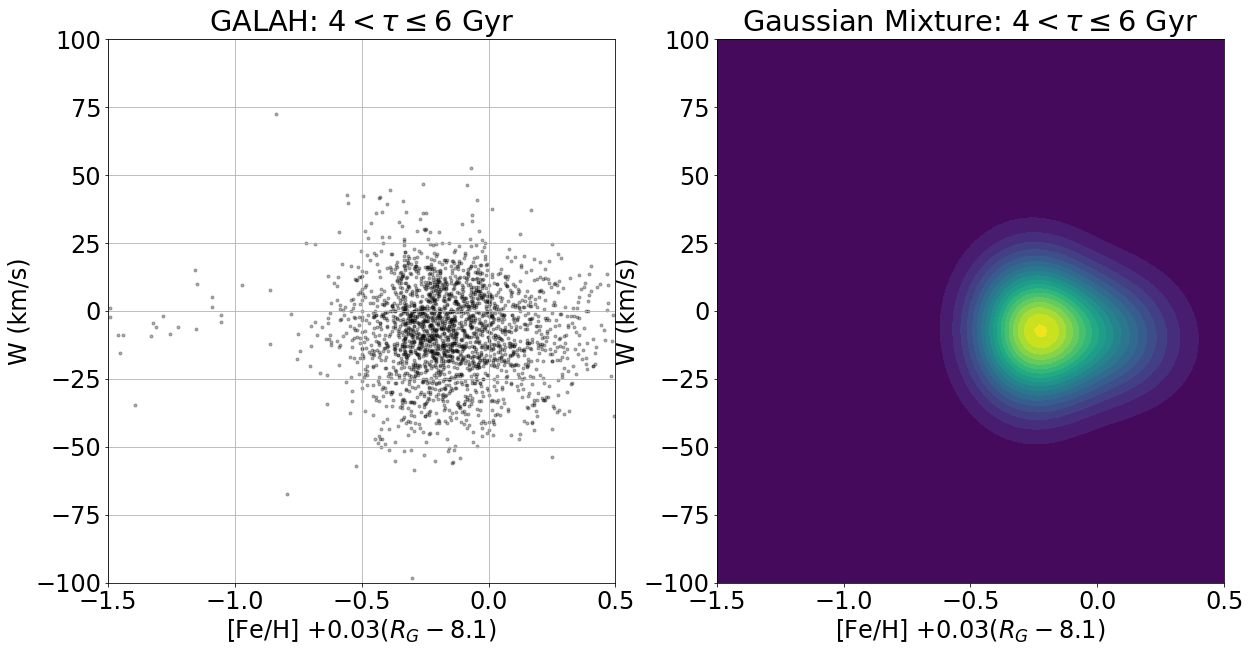

100%|██████████| 100/100 [00:00<00:00, 3140.53it/s]


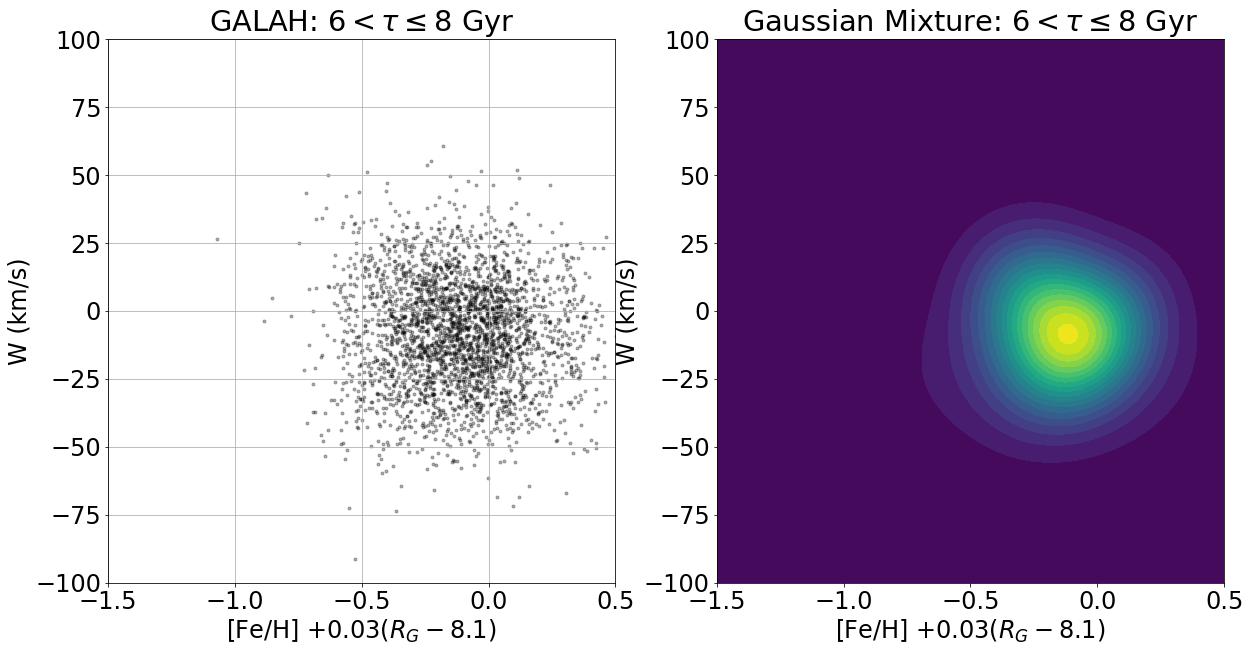

100%|██████████| 100/100 [00:00<00:00, 3638.46it/s]


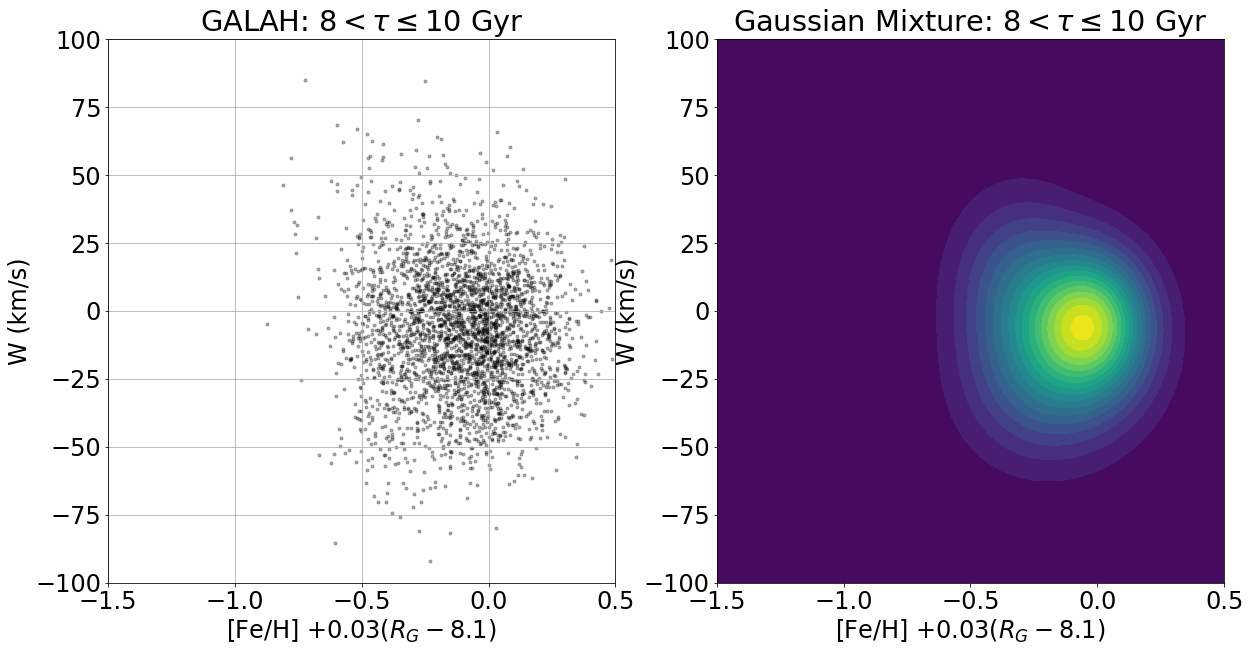

100%|██████████| 100/100 [00:00<00:00, 3044.51it/s]


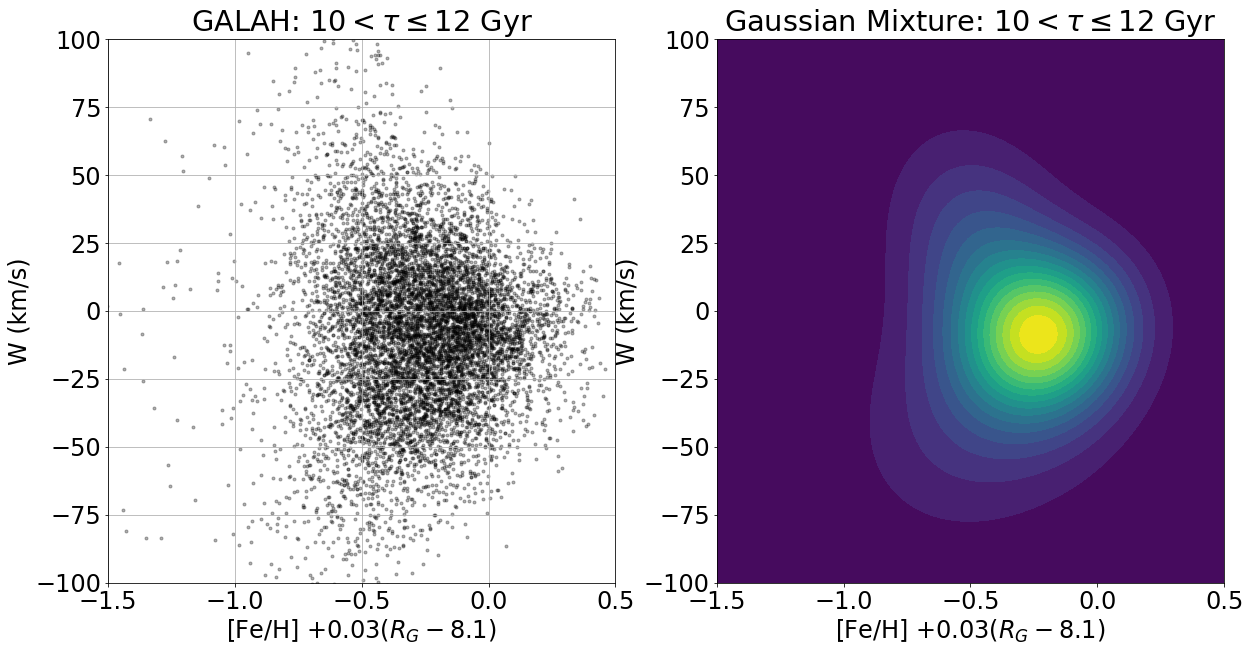

100%|██████████| 100/100 [00:00<00:00, 3490.28it/s]


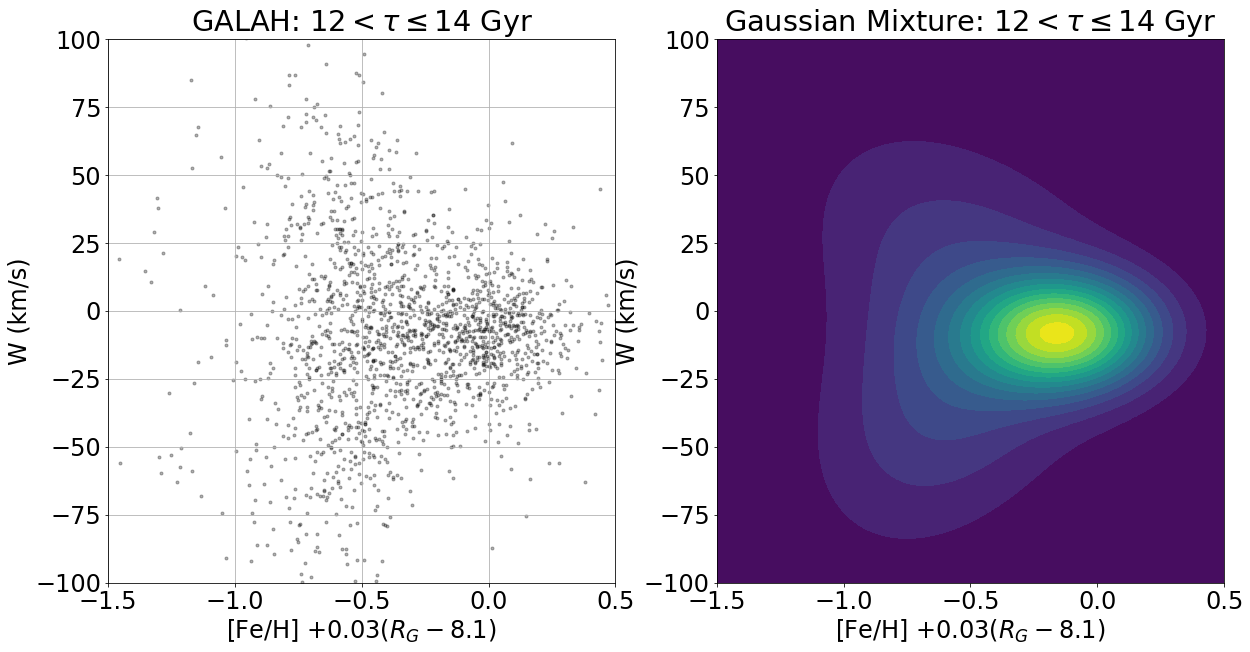

In [3]:
# get the GM models from GALAH
import numpy as np

GM.find_GMMs(np.arange(0, 16, 2), plot_dir='paper_plots')

100%|██████████| 10000/10000 [02:31<00:00, 66.00it/s]


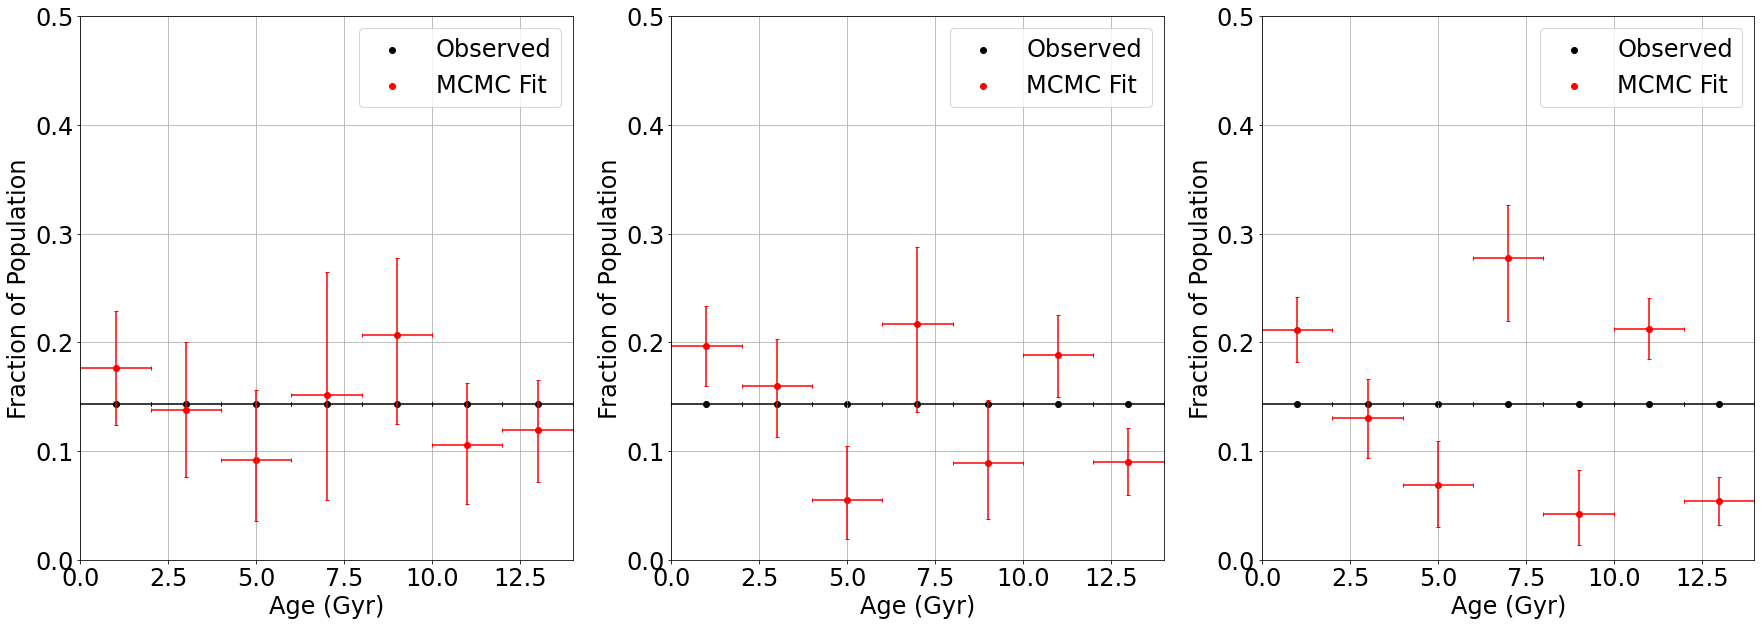

100%|██████████| 10000/10000 [02:27<00:00, 67.65it/s]


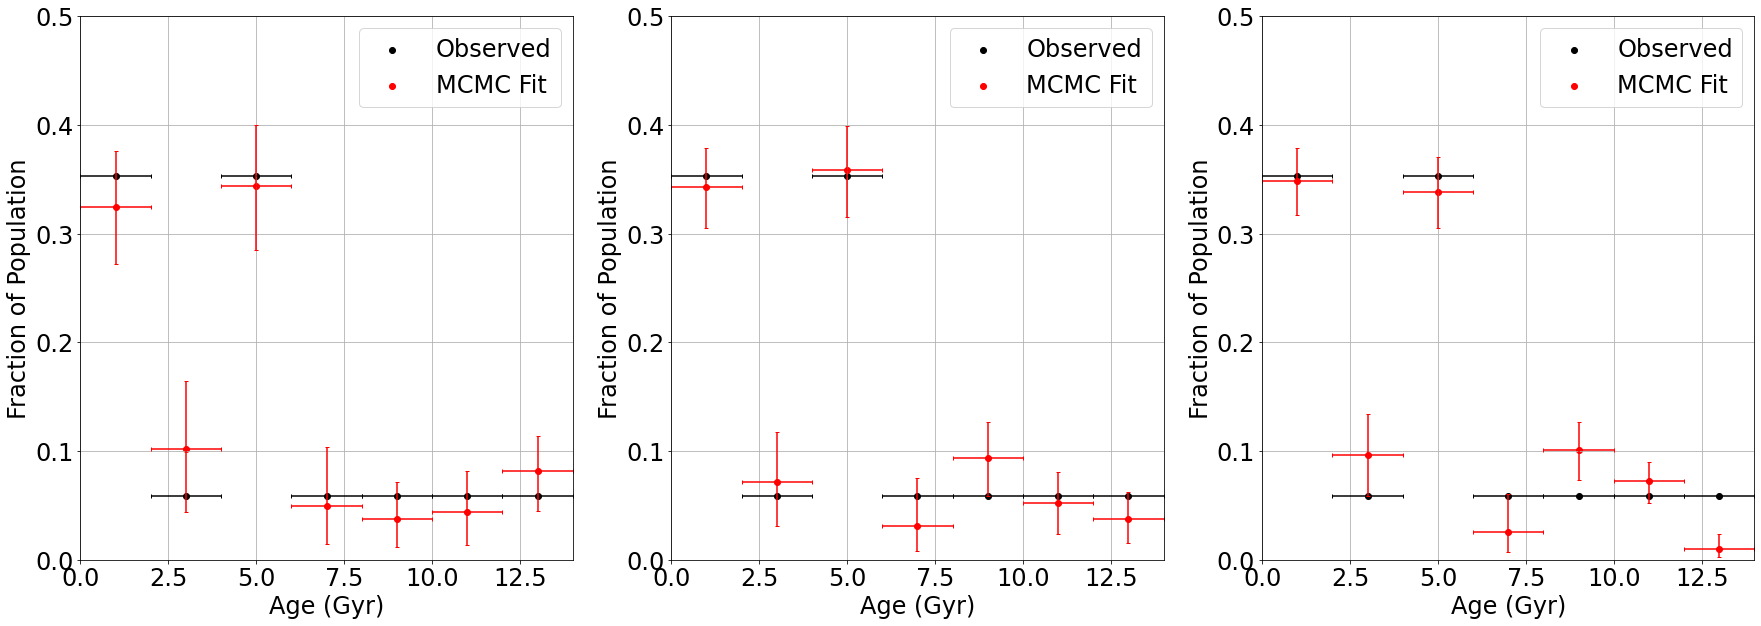

100%|██████████| 10000/10000 [03:01<00:00, 55.24it/s]


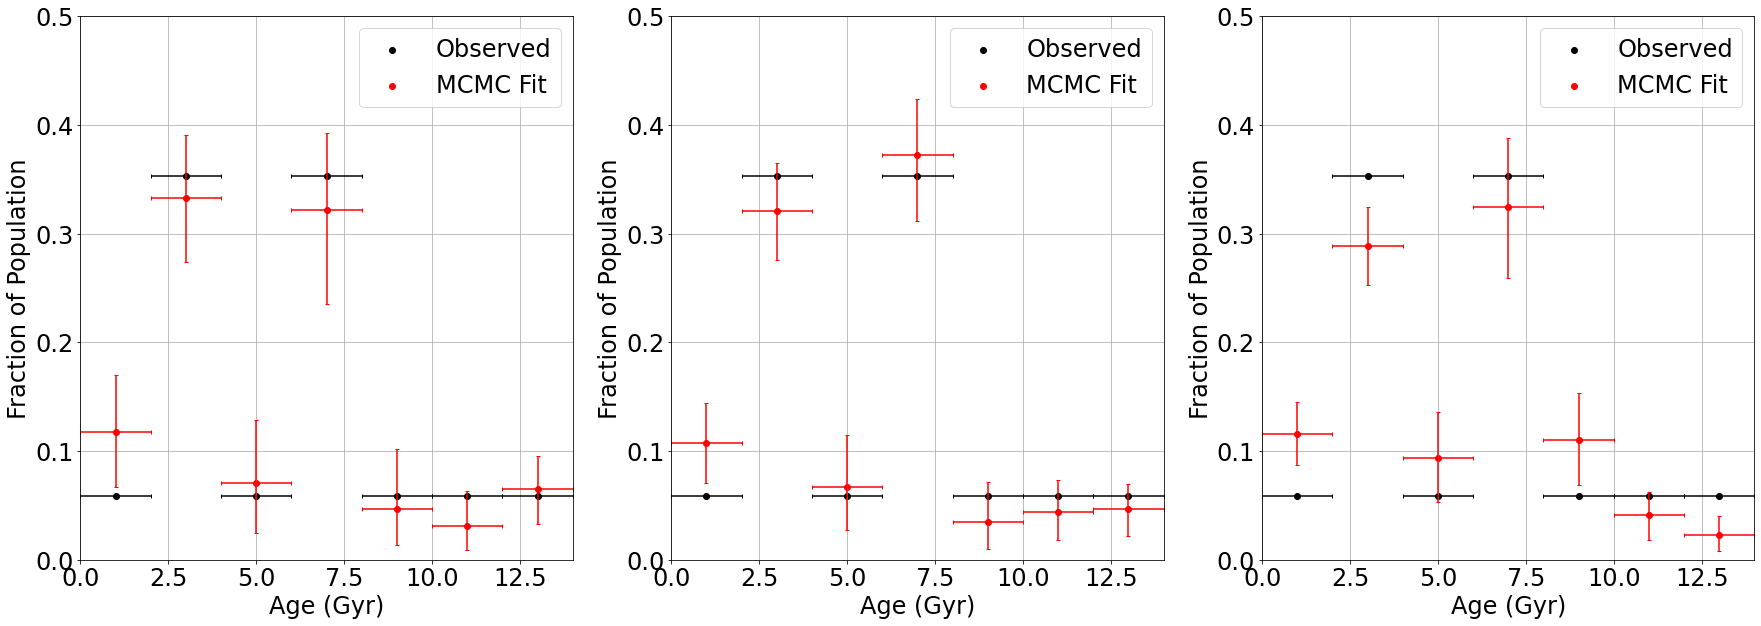

100%|██████████| 10000/10000 [02:38<00:00, 63.09it/s]


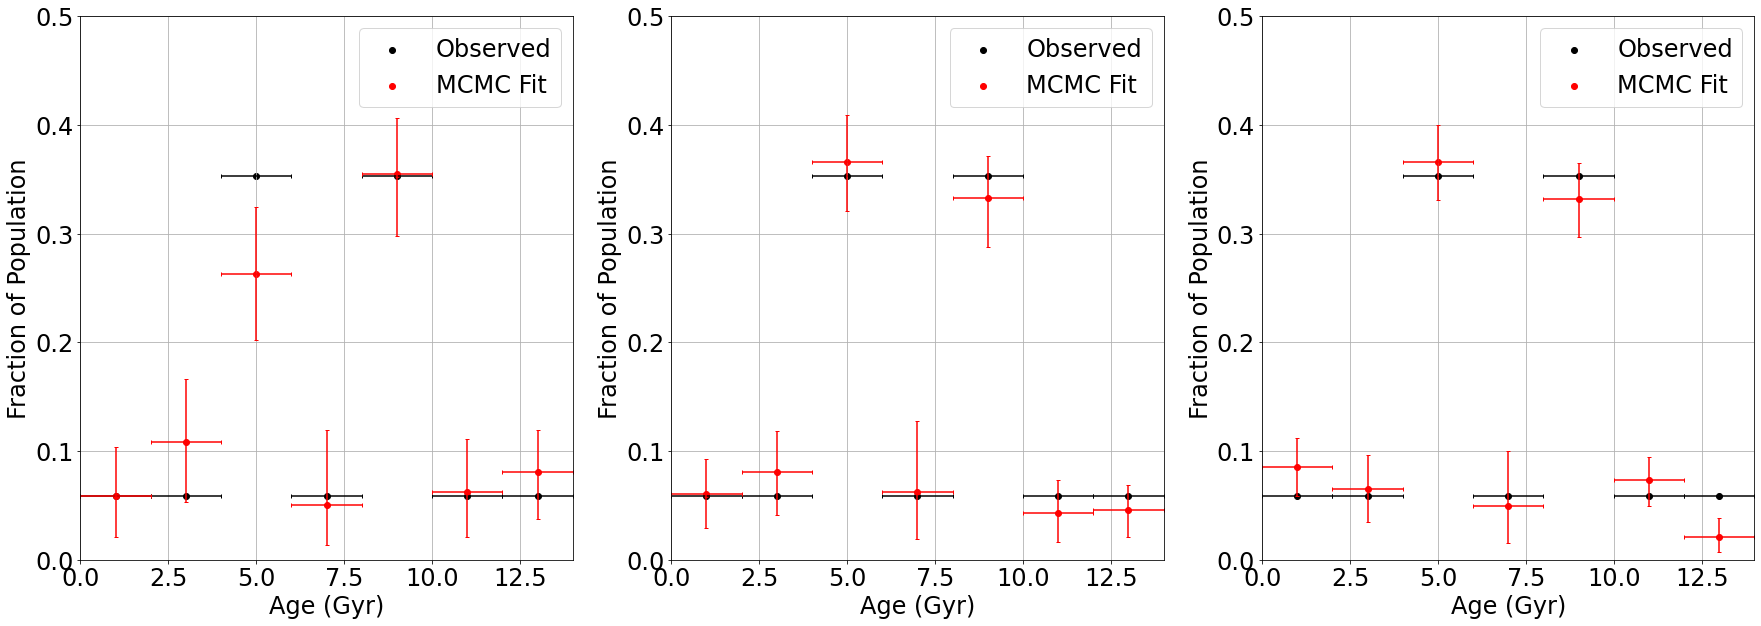

100%|██████████| 10000/10000 [02:38<00:00, 63.13it/s]


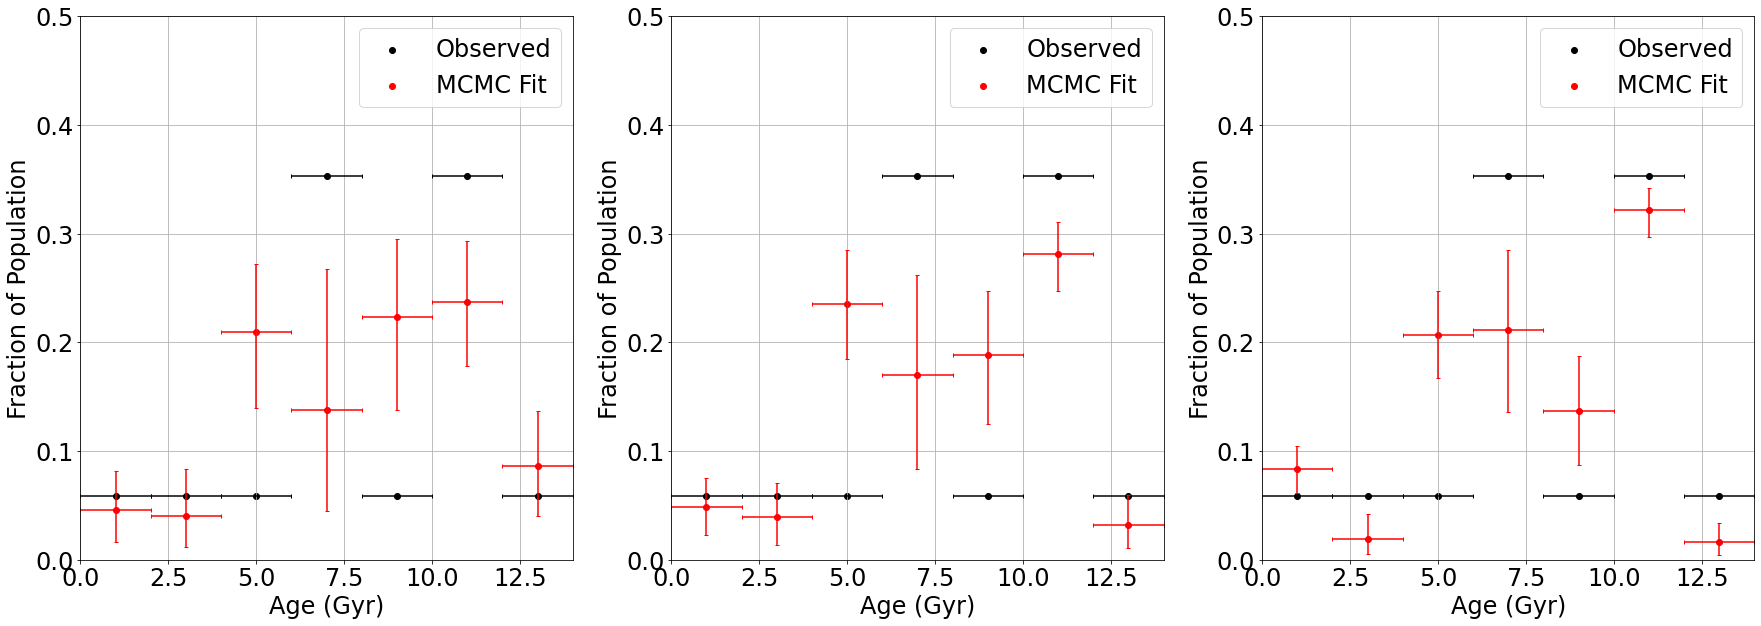

100%|██████████| 10000/10000 [02:46<00:00, 60.11it/s]


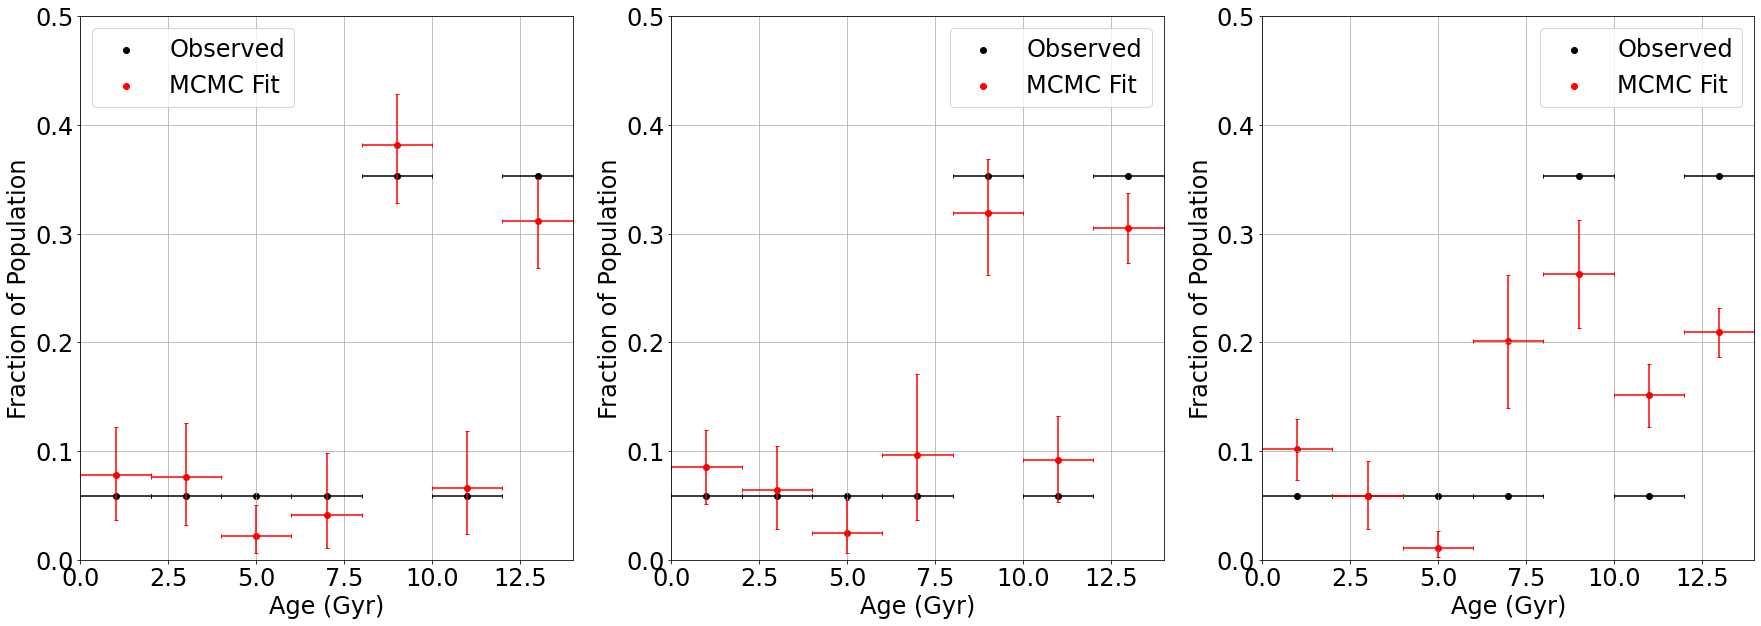

In [4]:
# do the 2 peak tests
sig_2 = GM.test_GMM_fit(6, 'paper_plots', npeaks=2, plot_mcmc_prog=False)

100%|██████████| 10000/10000 [02:21<00:00, 70.54it/s]


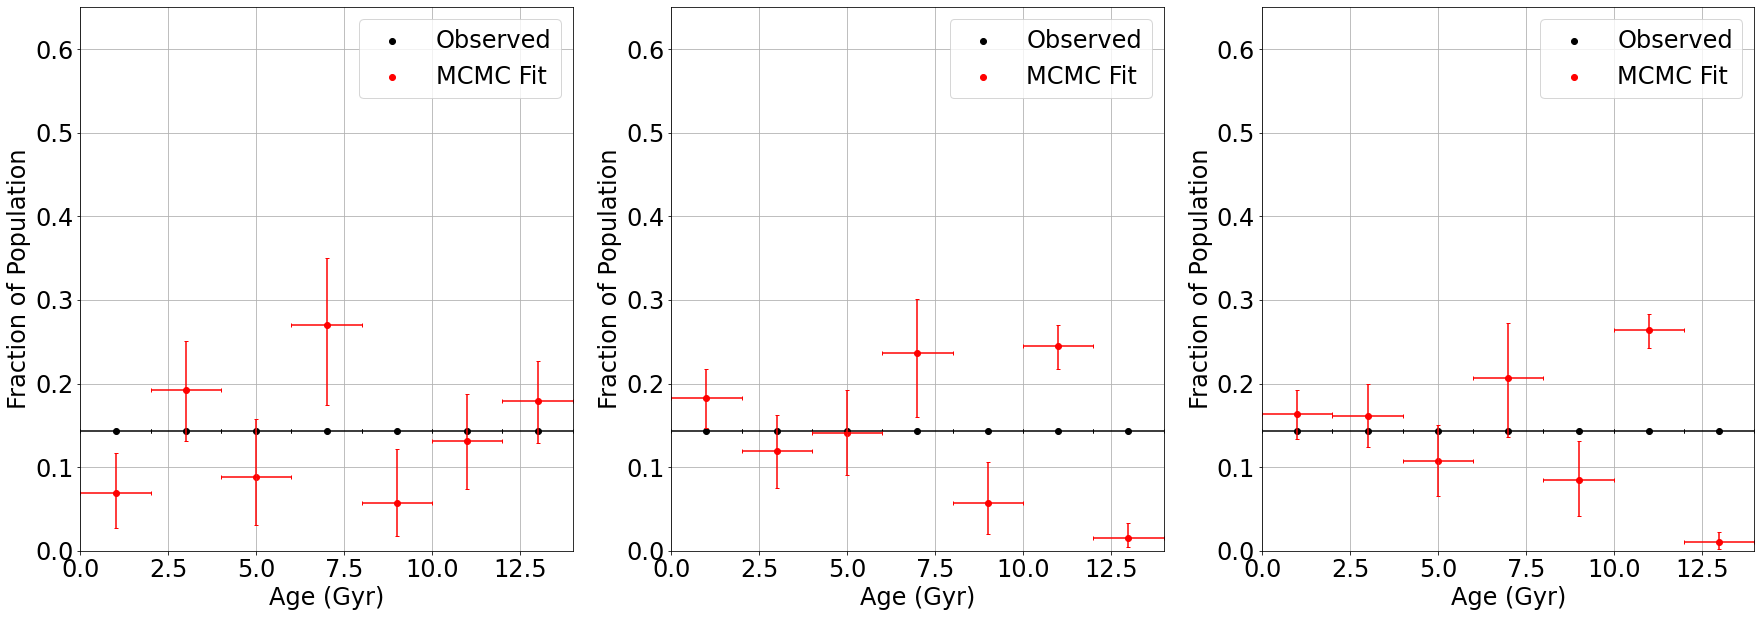

100%|██████████| 10000/10000 [02:29<00:00, 66.94it/s]


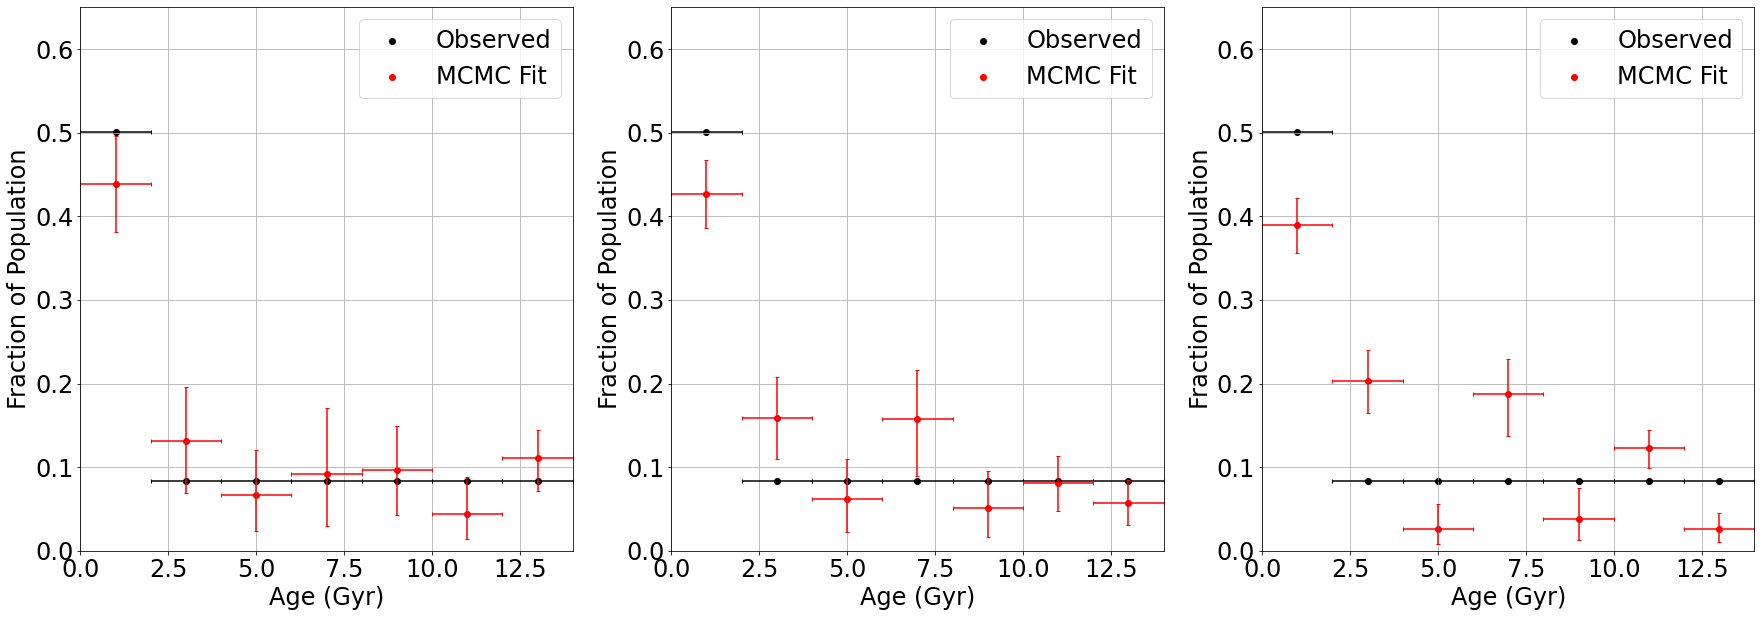

100%|██████████| 10000/10000 [02:45<00:00, 60.26it/s]


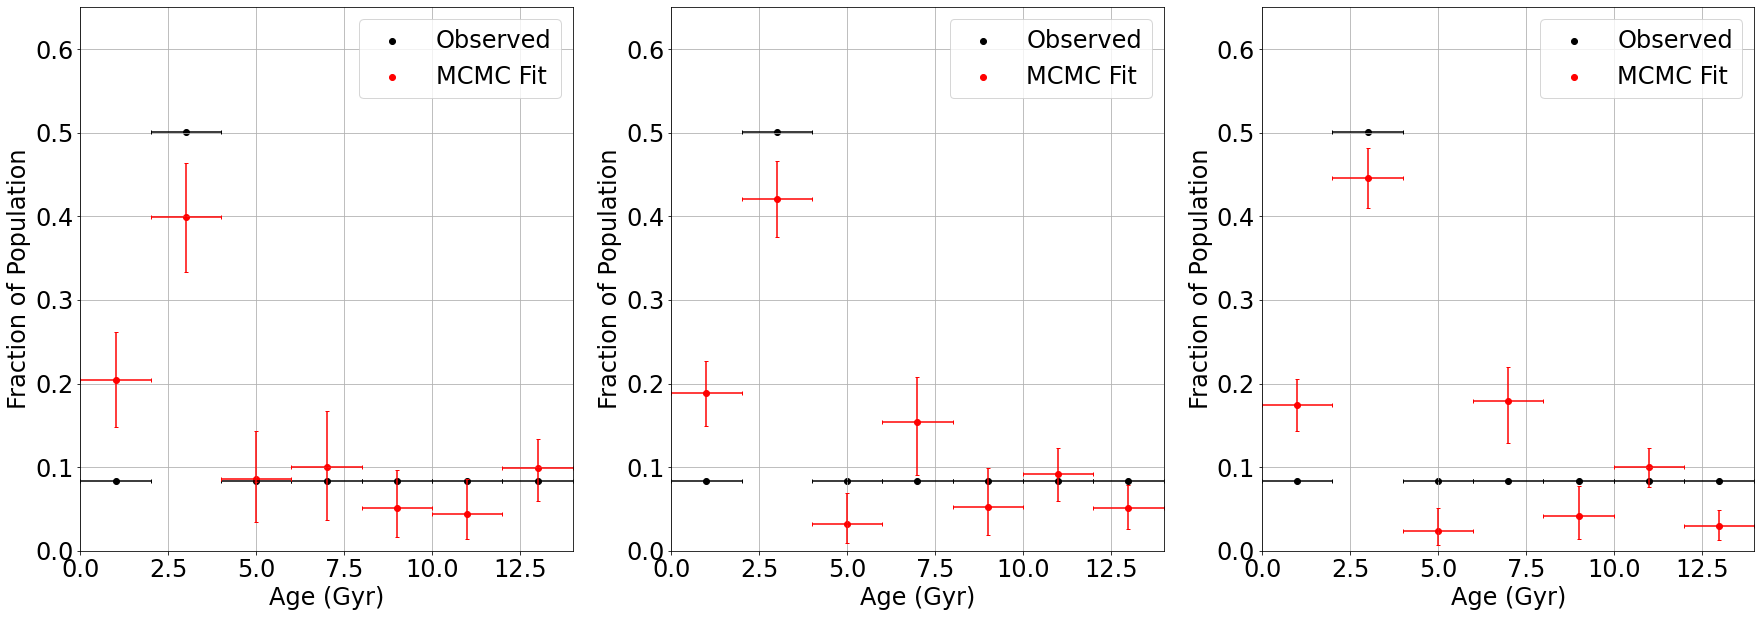

100%|██████████| 10000/10000 [03:14<00:00, 51.31it/s]


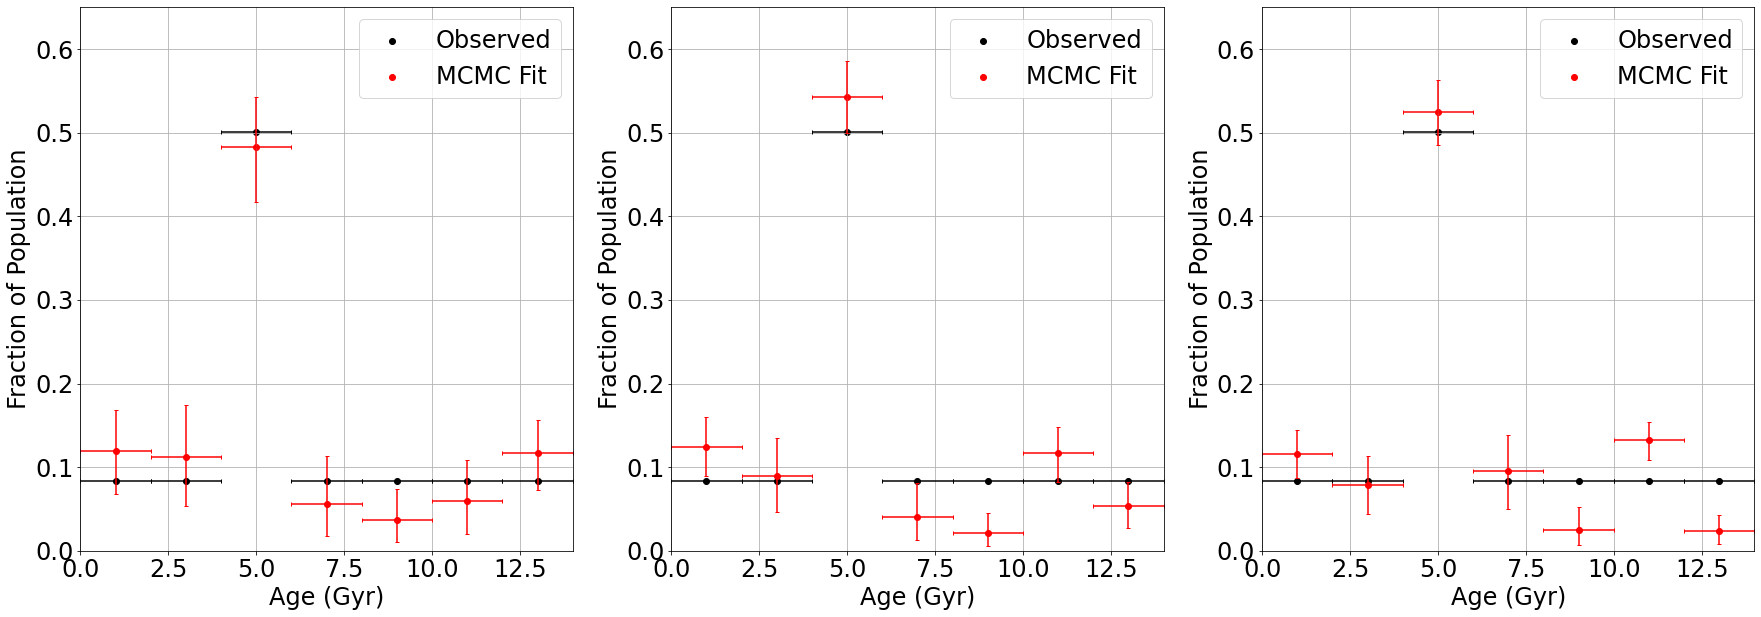

100%|██████████| 10000/10000 [03:12<00:00, 51.93it/s]


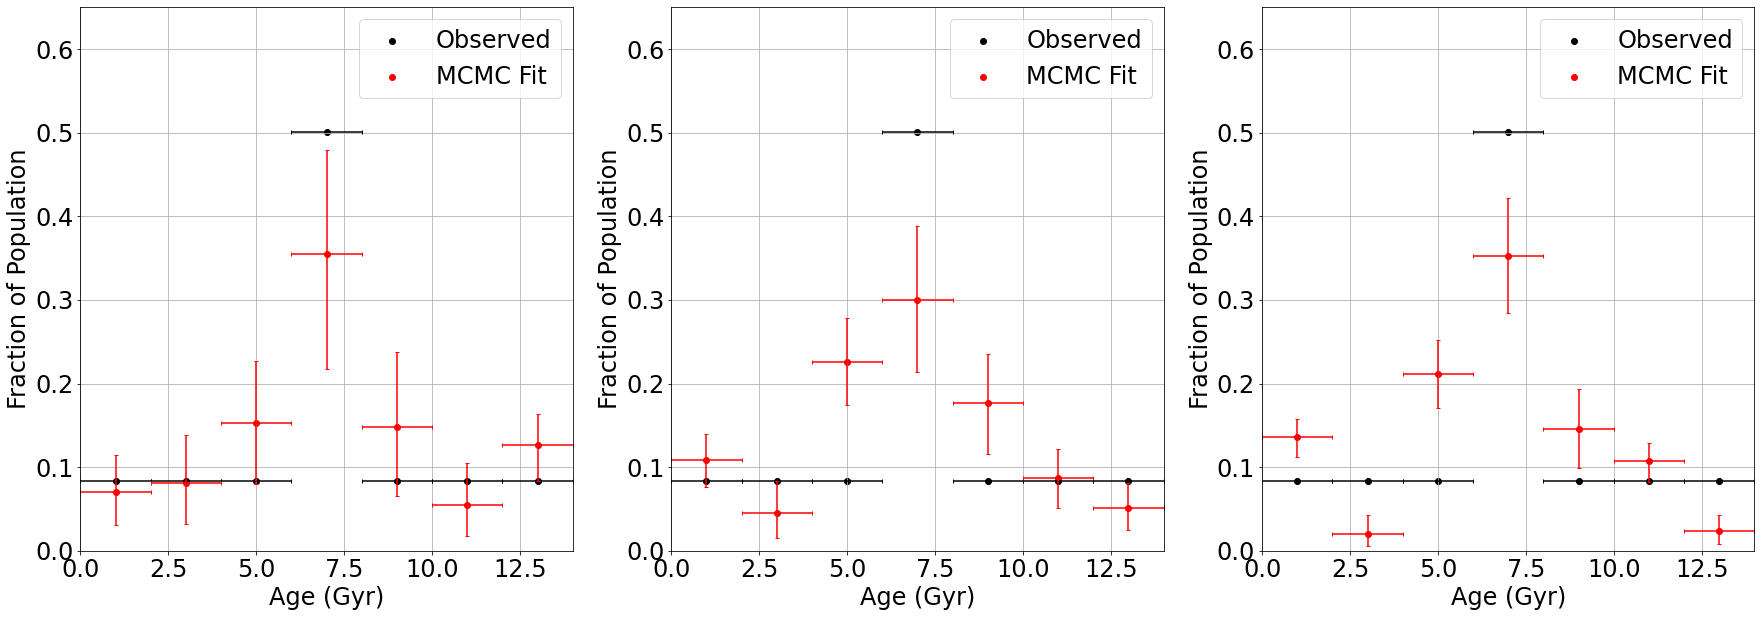

100%|██████████| 10000/10000 [03:28<00:00, 47.88it/s]


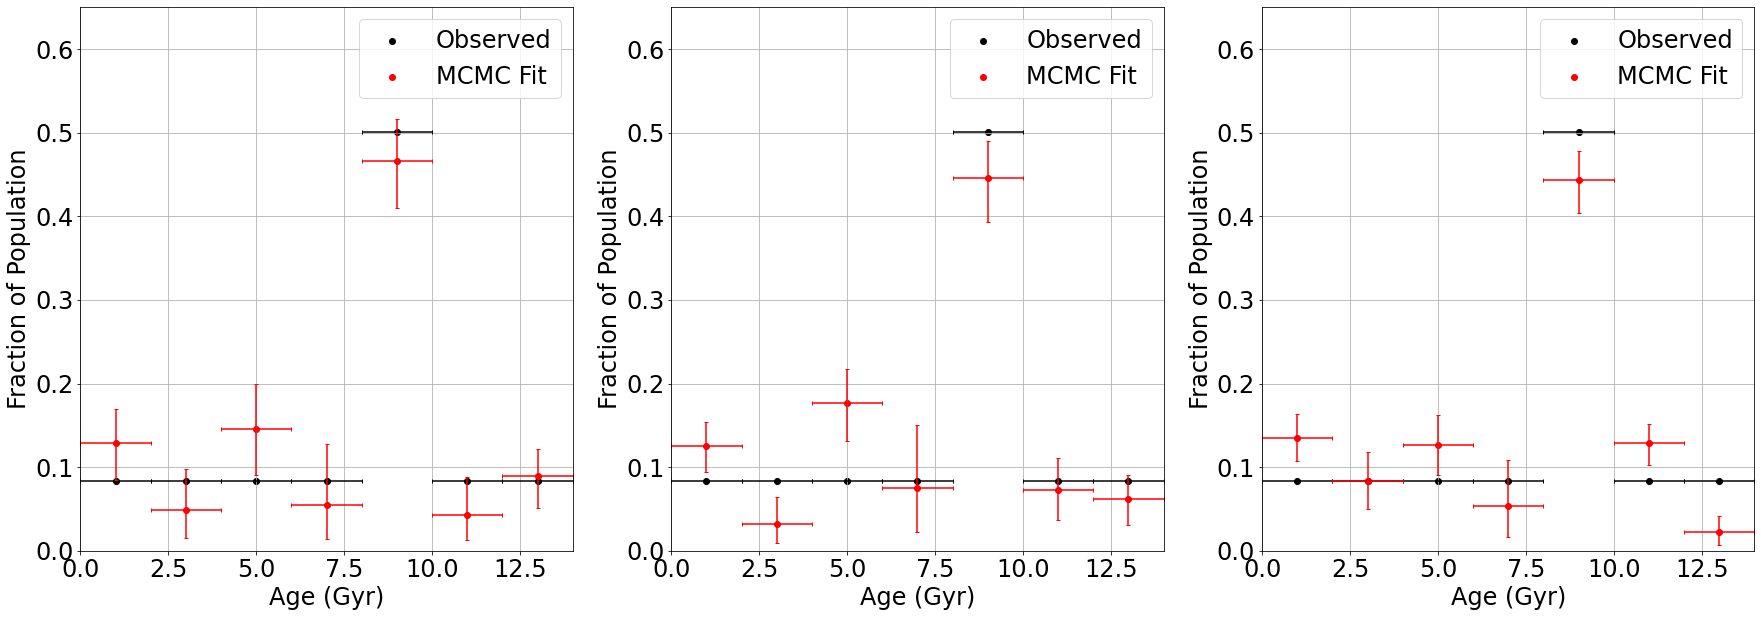

100%|██████████| 10000/10000 [03:09<00:00, 52.73it/s]


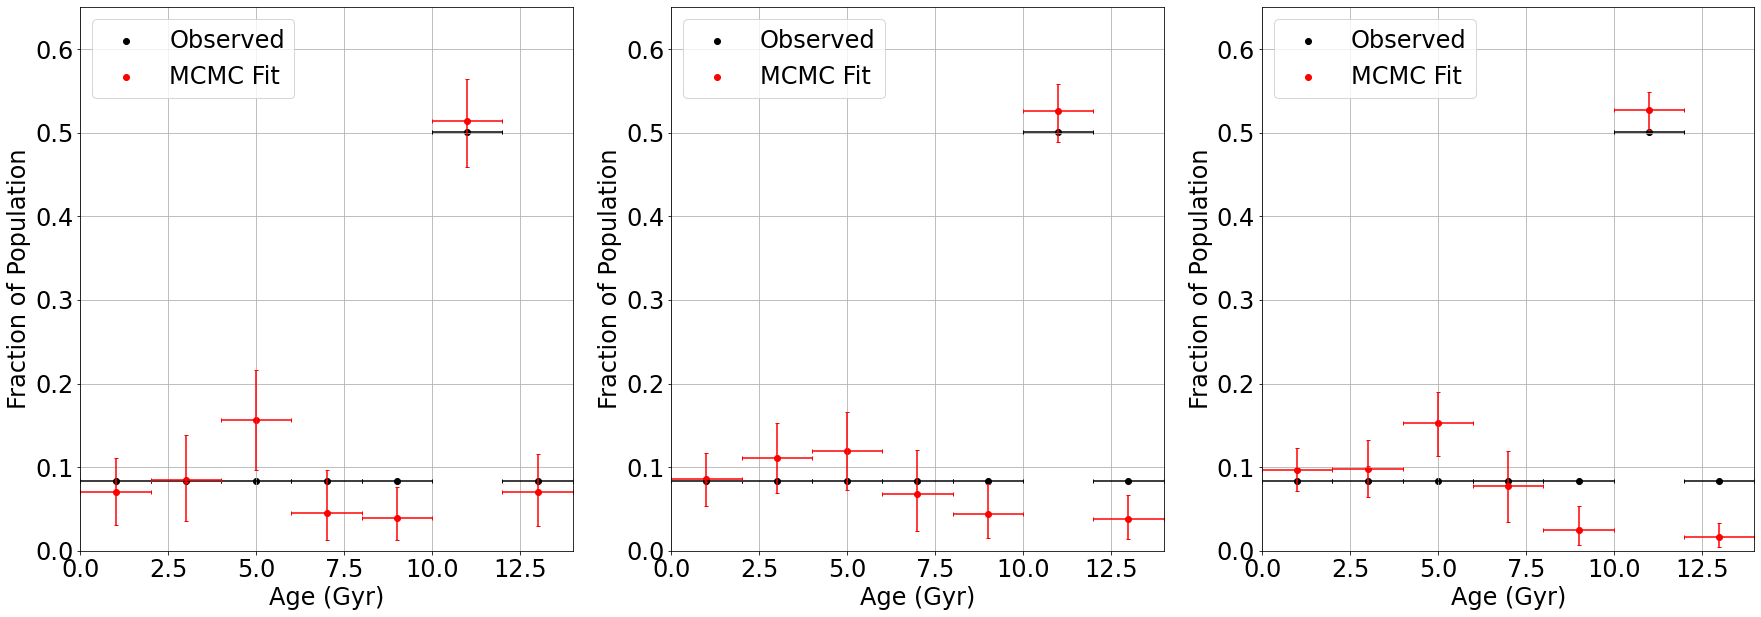

100%|██████████| 10000/10000 [03:19<00:00, 50.19it/s]


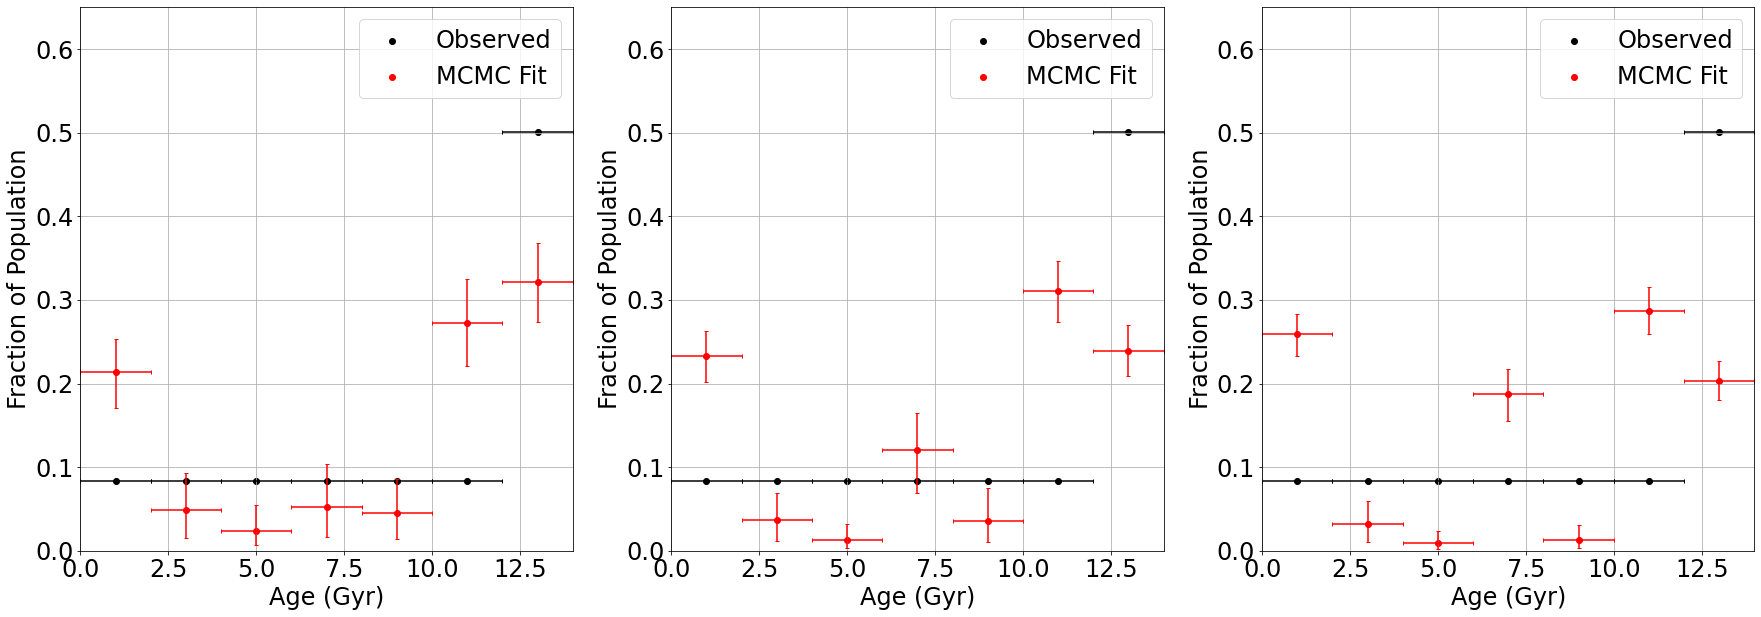

In [5]:
# do the 1 peak tests
sig_1 = GM.test_GMM_fit(8, 'paper_plots', npeaks=1, plot_mcmc_prog=False)

Two files are required to run the folllowing code. First the metallicities of the stars are needed. These are provided in the file `gaia_DR3_photo_metallicities.txt`, which is included in the repository. Additionally the Gaia data for the stars is needed. This is not included in this repository, but can be downloded from the __[Gaia archive](https://gea.esac.esa.int/index.html)__. The first dataset for `gaia_file` can be queried via:

```
SELECT g3.ra, g3.ra_error, g3.dec, g3.dec_error, g3.source_id, g3.parallax, g3.parallax_error, g3.pmra, g3.pmra_error, g3.pmdec, g3.pmdec_error, g3.phot_g_mean_mag, g3.phot_bp_mean_mag, g3.phot_rp_mean_mag, g3.radial_velocity, g3.radial_velocity_error, g3.rv_template_teff, g3.rv_template_fe_h, g3.ruwe
FROM gaiadr3.gaia_source as g3
WHERE g3.phot_g_mean_mag <= 14 AND g3.phot_rp_mean_mag <= 14 AND g3.phot_bp_mean_mag - g3.phot_rp_mean_mag > 0.98 AND g3.phot_bp_mean_mag - g3.phot_rp_mean_mag < 2.39 AND g3.parallax > 0 AND g3.phot_g_mean_mag + 5 * log10(0.001 * g3.parallax) + 5 > 4
```

and the second dataset for `gaia_dr2_match_file` can be queried via:

```
SELECT g3.source_id, gneigh.dr2_source_id, gneigh.angular_distance
FROM gaiadr3.gaia_source as g3
JOIN gaiadr3.dr2_neighbourhood AS gneigh ON g3.source_id = gneigh.dr3_source_id
WHERE g3.phot_g_mean_mag <= 14 AND g3.phot_rp_mean_mag <= 14 AND g3.phot_bp_mean_mag - g3.phot_rp_mean_mag > 0.98 AND g3.phot_bp_mean_mag - g3.phot_rp_mean_mag < 2.39 AND g3.parallax > 0 AND g3.phot_g_mean_mag + 5 * log10(0.001 * g3.parallax) + 5 > 4
```

In [6]:
KM = KM_metals(metals_file='gaia_DR3_photo_metallicities.txt',
               gaia_file='gaia_file/K_dwarf_RV_DR3-result.csv',
               gaia_dr2_match_file='gaia_file/K_dwarf_RV_DR3_w_DR2_match-result.csv')

/Users/imedan/anaconda3/lib/python3.6/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)

/Users/imedan/anaconda3/lib/python3.6/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)



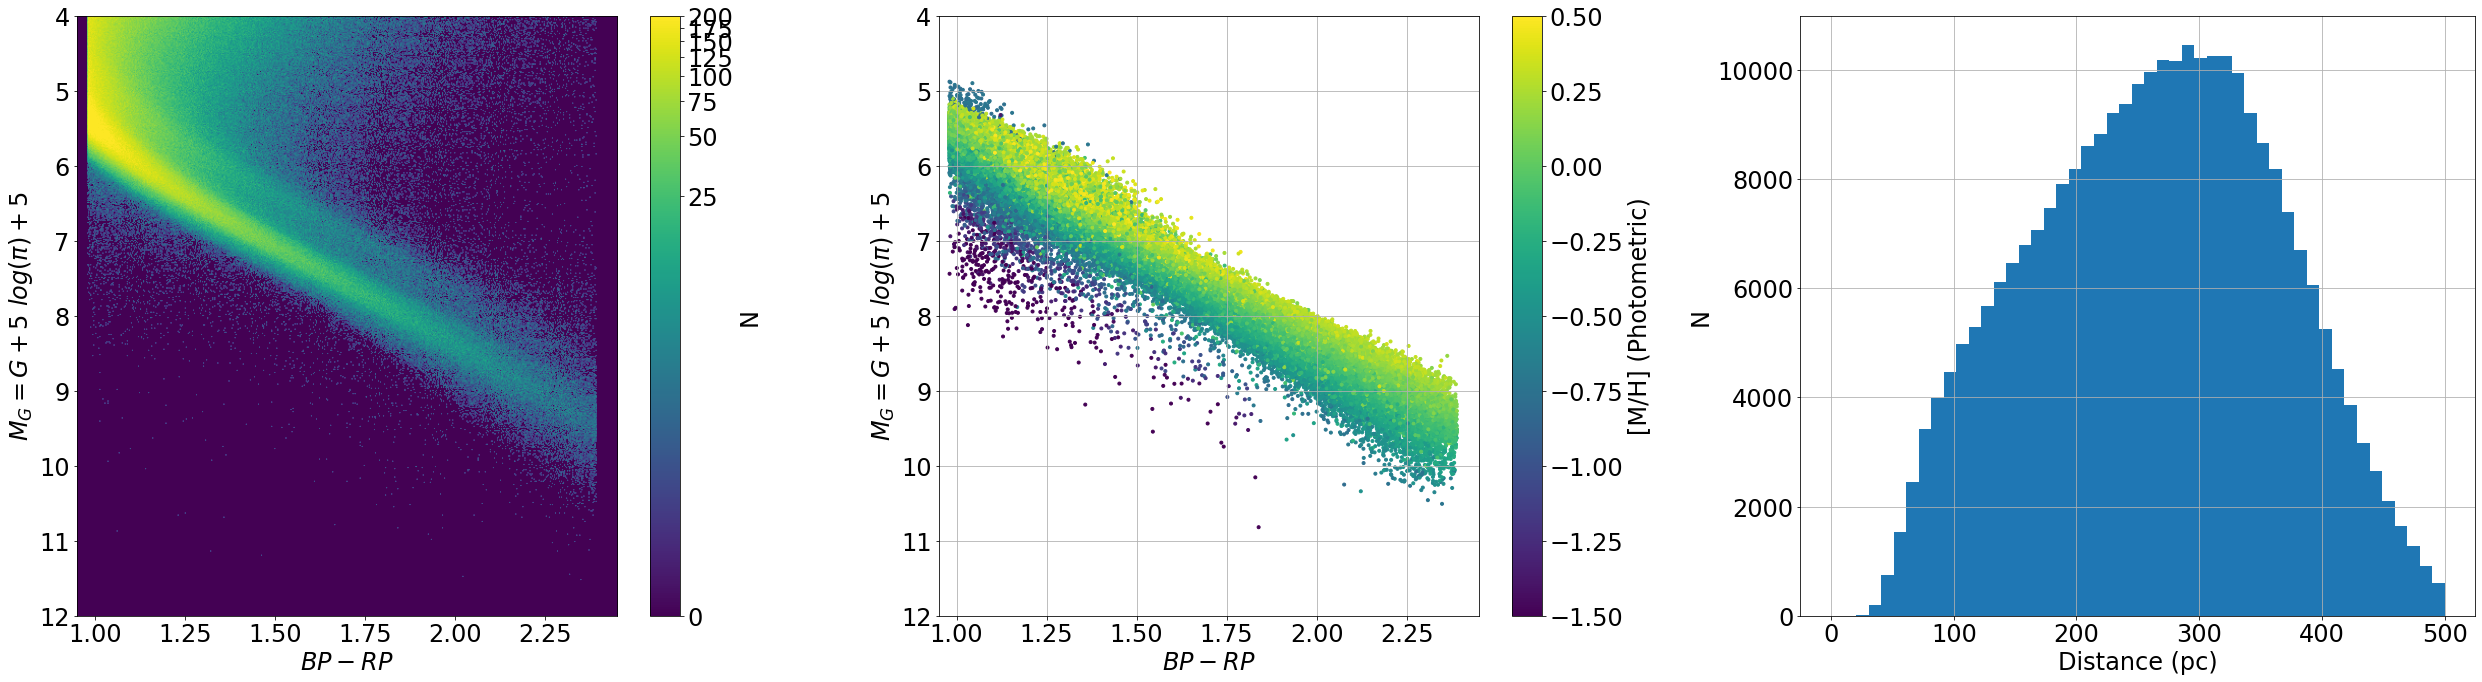

In [7]:
# make figure 1
import mpl_scatter_density
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os
%matplotlib inline
plt.style.use('%s/mystyle.mplstyle' % os.environ['MPL_STYLES'])

from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(vmin=0., vmax=200, stretch=LogStretch())

gaia = pd.read_csv('gaia_file/K_dwarf_RV_DR3-result.csv',
                    usecols=[0, 2, 4, 5, 7, 9, 11, 12, 13, 14, 15],
                    names=['RA', 'DEC', 'ID', 'plx', 'pmra',
                           'pmde', 'G', 'BP', 'RP', 'rv', 'rv_err'],
                    skiprows=1)

fig = plt.figure(figsize=(35, 10))
ax1 = fig.add_subplot(1, 3, 1, projection='scatter_density')
dens = ax1.scatter_density(gaia['BP'] - gaia['RP'],
                           gaia['G'] + 5 * np.log10(1e-3 * gaia['plx']) + 5,
                           norm=norm)
plt.colorbar(dens, ax=ax1, label='N')
ax1.set_xlabel(r'$BP-RP$')
ax1.set_ylabel(r'$M_G = G + 5 \ log(\pi) + 5$')
ax1.set_xlim((0.95, 2.45))
ax1.set_ylim((4, 12))
ax1.invert_yaxis()

ax2 = fig.add_subplot(1, 3, 2)
dens = ax2.scatter(KM.KM_metals['BP'] - KM.KM_metals['RP'],
                    KM.KM_metals['G'] + 5 * np.log10(1e-3 * KM.KM_metals['plx']) + 5,
                    marker='.', c=KM.KM_metals['M_H'], vmin=-1.5, vmax=0.5)
plt.colorbar(dens, ax=ax2, label='[M/H] (Photometric)')
ax2.set_xlabel(r'$BP-RP$')
ax2.set_ylabel(r'$M_G = G + 5 \ log(\pi) + 5$')
ax2.grid()
ax2.set_xlim((0.95, 2.45))
ax2.set_ylim((4, 12))
ax2.invert_yaxis()

ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(1000 / KM.KM_metals['plx'], bins=np.linspace(0, 500, 50))
ax3.grid()
ax3.set_xlabel('Distance (pc)')
ax3.set_ylabel('N')
plt.tight_layout()
plt.savefig('paper_plots/photo_metallciities_gaia_hr_ext_corr.png', dpi=100,
            bbox_inches='tight')

plt.show()

To make the comparison between the following spectroscopic surveys and the photometric metallicites, the particular catalogs need to be downloaded. This includes the GALAH DR3 catalog (see above), the __[APOGEE DR16 catalog](https://dr16.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/allStarLite-r12-l33.fits)__ and the __[APOGEE DR14 catalog](https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/allStar-r12-l33.fits)__.

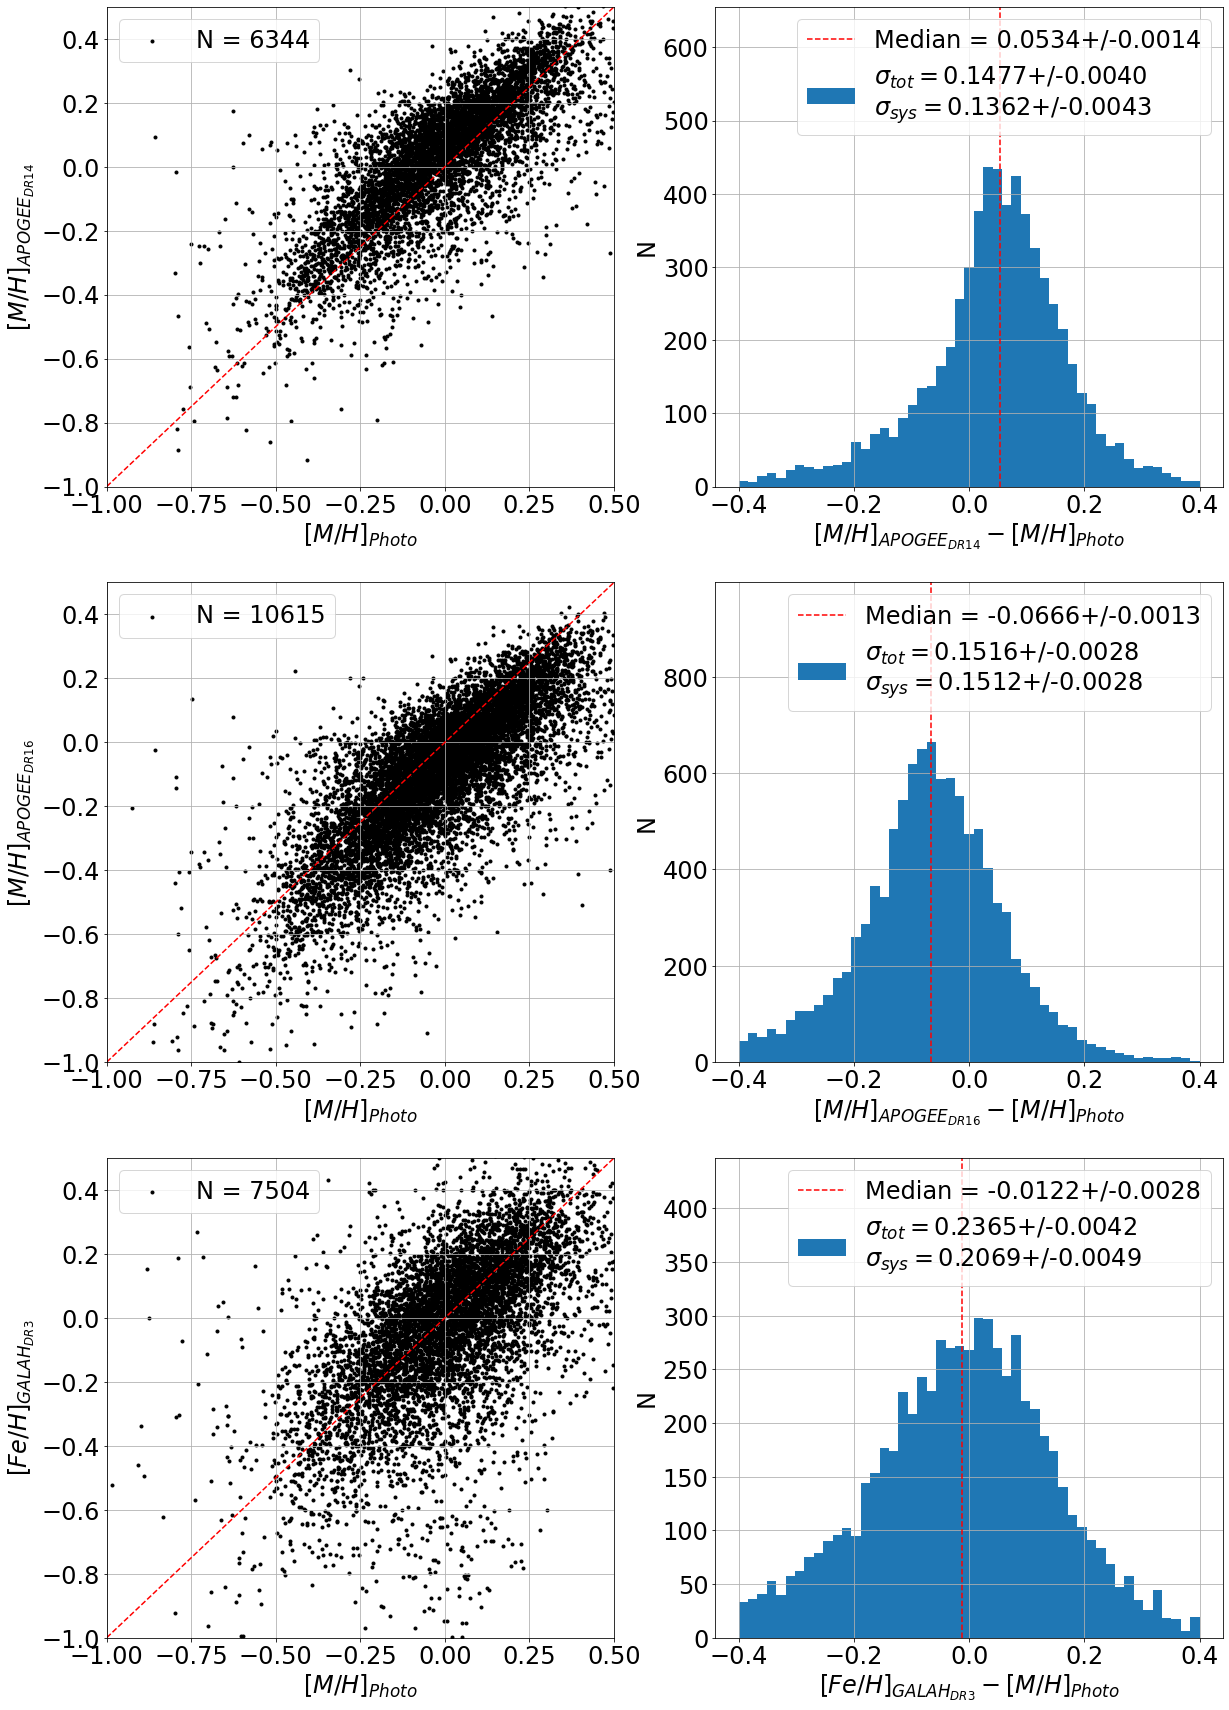

In [8]:
# make figure 2

galah_file = 'galah_data/GALAH_DR3_main_allstar_v2.fits'
apogee_16_file = '../500_pc_KM_rv_cross_match/APOGEE_DR16_allStarLite-r12-l33.fits'
apogee_14_file = '../500_pc_KM_rv_cross_match/APOGEE_DR14_allStar-l31c.2.fits'
compare_all_spec_surveys(galah_file, apogee_16_file, apogee_14_file,
                         KM.KM_metals, 'paper_plots/compare_all_spec_metals.png')

In [9]:
KM.assign_kinematic_groups(plot_groups=False)

/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:1096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.KM_metals['group'][ev] = n

/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:1156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.stream_dfs['%d' % i]['group_pca_sig'][ev] = sig_cut

/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:1156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.stream_dfs

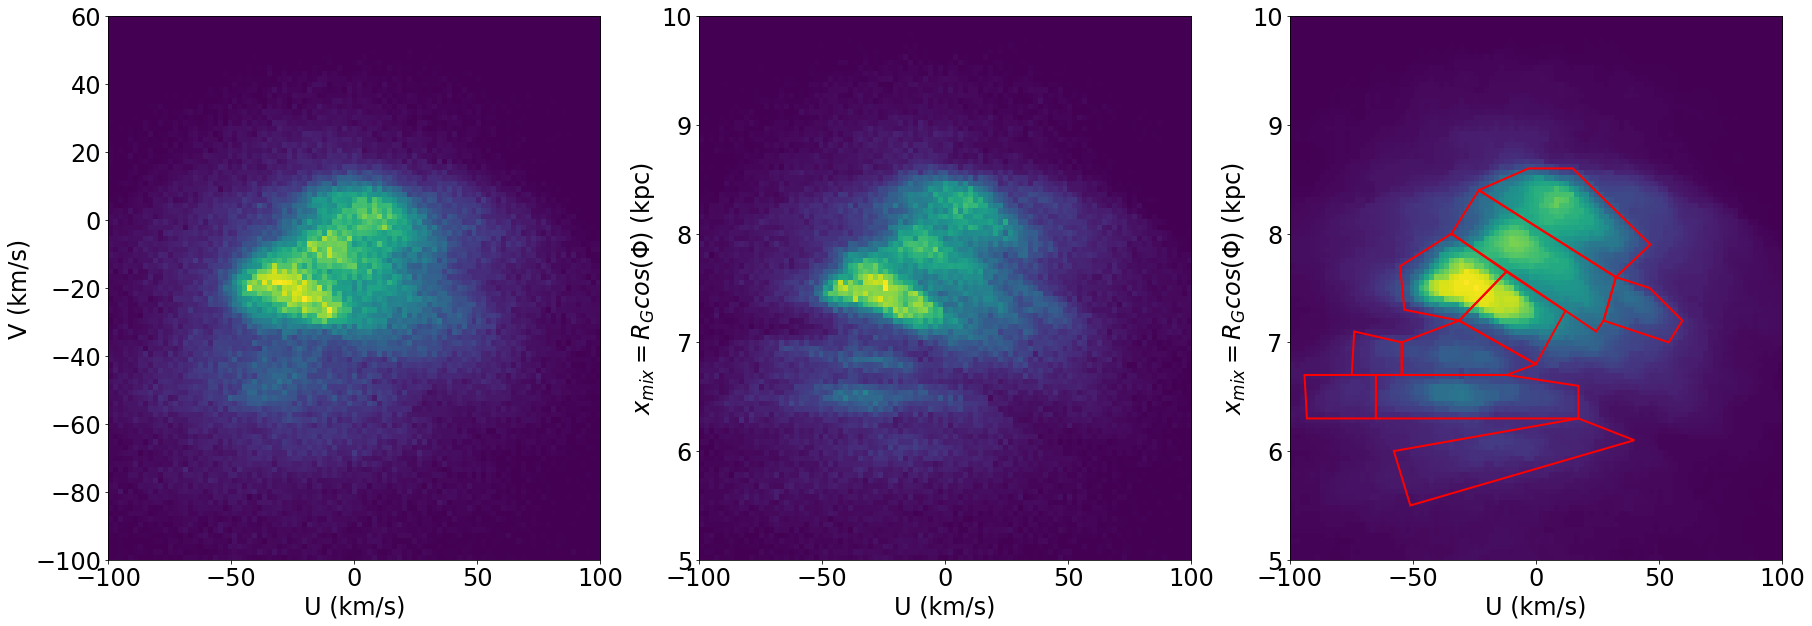

In [10]:
# make figure 3 for the paper
from scipy.stats import binned_statistic_2d
from scipy.ndimage import gaussian_filter, median_filter



f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))

stat0, xe0, ye0, bn0 = binned_statistic_2d(KM.KM_metals['gu'], 
                                           KM.KM_metals['gv'],
                                           KM.KM_metals['gu'], statistic='count', 
                                           bins=[np.linspace(-100,100,100),
                                                 np.linspace(-100, 60,100)])

ax1.imshow(stat0.T, origin='lower', interpolation=None, aspect='auto',
           extent=[xe0.min(), xe0.max(), ye0.min(), ye0.max()])
ax1.set_xlabel('U (km/s)')
ax1.set_ylabel('V (km/s)')
ax1.set_xlim((-100, 100))
ax1.set_ylim((-100, 60))

stat0, xe0, ye0, bn0 = binned_statistic_2d(KM.KM_metals['gu'], 
                                           KM.KM_metals['xmix'],
                                           KM.KM_metals['gu'], statistic='count', 
                                           bins=[np.linspace(-100,100,100),
                                                 np.linspace(5,10,100)])

ax2.imshow(stat0.T, origin='lower', interpolation=None, aspect='auto',
           extent=[xe0.min(), xe0.max(), ye0.min(), ye0.max()])
ax2.set_xlabel('U (km/s)')
ax2.set_ylabel(r'$x_{mix}=R_G cos(\Phi)$ (kpc)')
ax2.set_xlim((-100, 100))
ax2.set_ylim((5, 10))

smooth = median_filter(stat0, 4)
ax3.imshow(smooth.T, origin='lower', interpolation=None, aspect='auto',
           extent=[xe0.min(), xe0.max(), ye0.min(), ye0.max()])
ax3.set_xlabel('U (km/s)')
ax3.set_ylabel(r'$x_{mix}=R_G cos(\Phi)$ (kpc)')
ax3.set_xlim((-100, 100))
ax3.set_ylim((5, 10))
KM.polygons = KM.init_polygons()
for poly in KM.polygons:
    ax3.add_patch(poly)

plt.savefig('paper_plots/UV_vs_xmix_w_initial_polys_ext_corr.png', dpi=100,
            bbox_inches='tight')
plt.show()



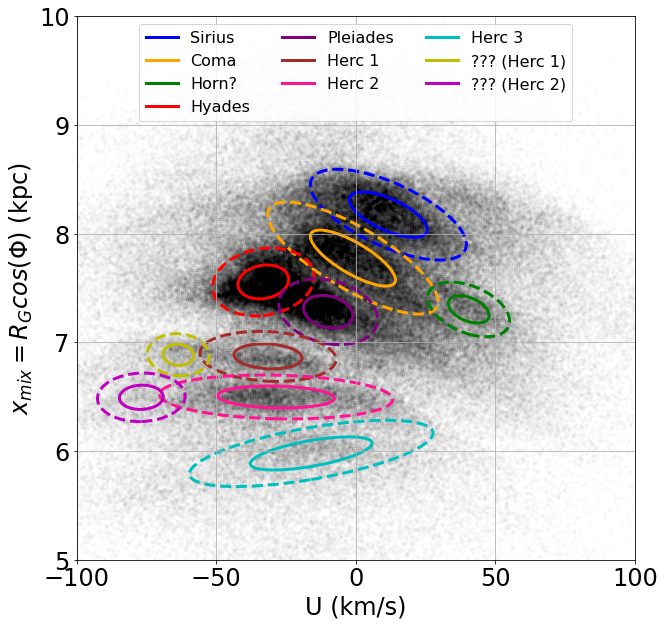

In [11]:
# figure 4

from matplotlib.patches import Ellipse

cs = ['b','orange','g','red','purple','brown','deeppink','c','y','m']
names = ['Sirius','Coma','Horn?','Hyades','Pleiades','Herc 1',
         'Herc 2', 'Herc 3', '??? (Herc 1)', '??? (Herc 2)']



f, ax1 = plt.subplots(1, 1, figsize=(10, 10))

ax1.scatter(KM.KM_metals['gu'], KM.KM_metals['xmix'], c='k', marker='.', alpha=0.01)
ax1.set_xlabel('U (km/s)')
ax1.set_ylabel(r'$x_{mix}=R_G cos(\Phi)$ (kpc)')
ax1.grid()
ax1.set_xlim((-100, 100))
ax1.set_ylim((5, 10))

for i in range(len(cs)):
    ax1.plot([0], [0], c=cs[i], lw=3, label=names[i])
    e = Ellipse(xy=[KM.mean1[i], KM.mean2[i]], 
                width=(2 / 3) * KM.std1[i] * 2,
                height=(2 / 3) * KM.std2[i] * 2, 
                angle=KM.angles[i],
                edgecolor=cs[i], lw=3, facecolor='none',linestyle='--')
    ax1.add_artist(e)
    e = Ellipse(xy=[KM.mean1[i], KM.mean2[i]], 
                width=(1 / 3) * KM.std1[i] * 2,
                height=(1 / 3) * KM.std2[i] * 2, 
                angle=KM.angles[i],
                edgecolor=cs[i], lw=3, facecolor='none')
    ax1.add_artist(e)
ax1.legend(loc='upper center',ncol=3, prop={'size': 16})
plt.savefig('paper_plots/UV_PCA_ellipses_ext_corr.png', dpi=100, bbox_inches='tight')
plt.show()

In [12]:
len(KM.KM_metals)

283007

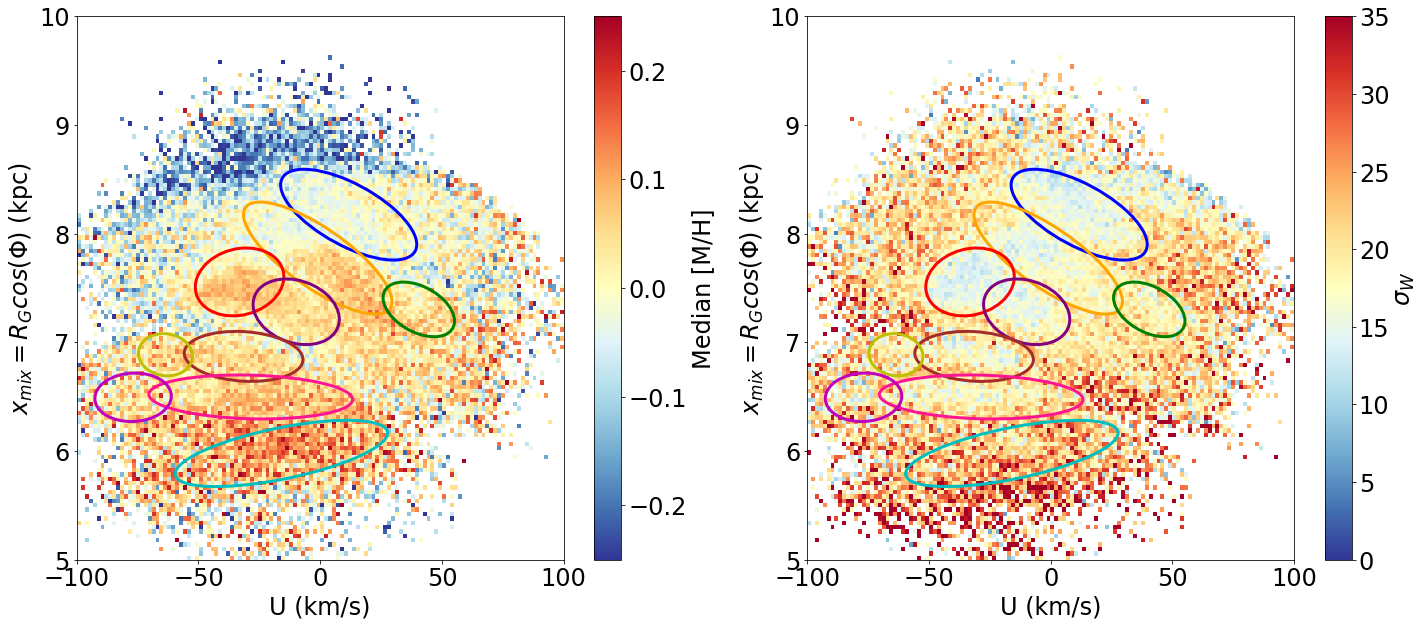

In [13]:
# figure 5
nside = 125
stat_count, xe0, ye0, bn0 = binned_statistic_2d(KM.KM_metals['gu'],
                                                KM.KM_metals['xmix'],
                                                KM.KM_metals['M_H'],
                                                statistic='count', 
                                                bins=[np.linspace(-100,100,nside),
                                                      np.linspace(5,10,nside)])

statMH, xe0, ye0, bn0 = binned_statistic_2d(KM.KM_metals['gu'],
                                            KM.KM_metals['xmix'],
                                            KM.KM_metals['M_H'],
                                            statistic='median', 
                                            bins=[np.linspace(-100,100,nside),
                                                  np.linspace(5,10,nside)])

statMH[stat_count < 5] = np.nan

statW, xe0, ye0, bn0 = binned_statistic_2d(KM.KM_metals['gu'],
                                           KM.KM_metals['xmix'],
                                           KM.KM_metals['gw'],
                                           statistic='std', 
                                           bins=[np.linspace(-100,100,nside),
                                                 np.linspace(5,10,nside)])

statW[stat_count < 5] = np.nan

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

dens = ax1.imshow(statMH.T, origin='lower', interpolation=None, aspect='auto',
                  extent=[xe0.min(),xe0.max(),ye0.min(),ye0.max()],
                  cmap='RdYlBu_r',vmin=-0.25,vmax=0.25)
plt.colorbar(dens, label='Median [M/H]', ax=ax1)

dens = ax2.imshow(statW.T, origin='lower', interpolation=None, aspect='auto',
                  extent=[xe0.min(),xe0.max(),ye0.min(),ye0.max()],
                  cmap='RdYlBu_r',vmin=0,vmax=35)
plt.colorbar(dens, label=r'$\sigma_W$', ax=ax2)

for ax in [ax1, ax2]:
    ax.set_xlabel('U (km/s)')
    ax.set_ylabel(r'$x_{mix}=R_G cos(\Phi)$ (kpc)')
    ax.set_xlim((-100, 100))
    ax.set_ylim((5, 10))
    for i in range(len(cs)):
        e = Ellipse(xy=[KM.mean1[i], KM.mean2[i]], 
                    width=(2 / 3) * KM.std1[i] * 2,
                    height=(2 / 3) * KM.std2[i] * 2, 
                    angle=KM.angles[i],
                    edgecolor=cs[i], lw=3, facecolor='none')
        ax.add_artist(e)

plt.savefig('paper_plots/xmix_vs_U_heat_map_w_labels.png', dpi=100, bbox_inches='tight')
plt.show()
    



100%|██████████| 10000/10000 [03:33<00:00, 46.77it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:20<00:00, 70.97it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:15<00:00, 73.91it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



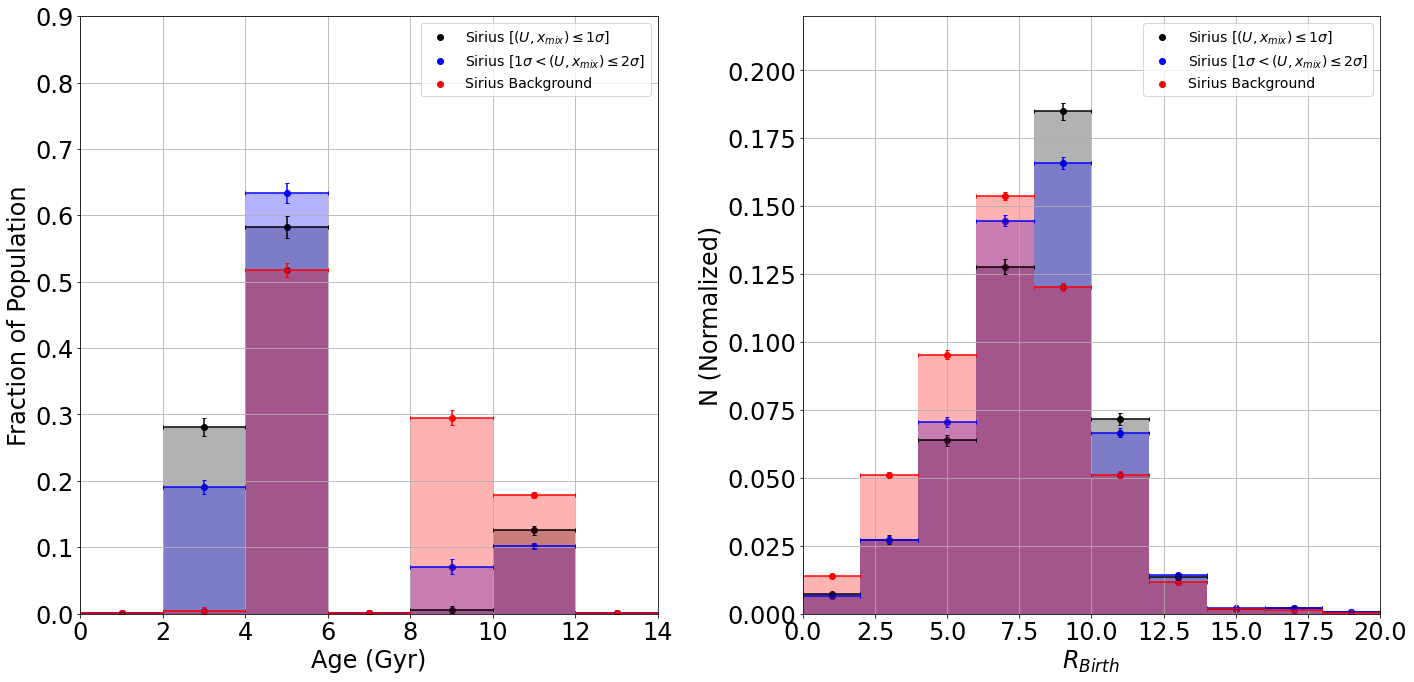

100%|██████████| 10000/10000 [02:12<00:00, 75.54it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:01<00:00, 82.20it/s]
N/50 = 200;
tau: [ 76.27174304 193.80351504 222.59222924 134.1688392  130.0697794
  92.58961436  85.82439207]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:13<00:00, 74.95it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



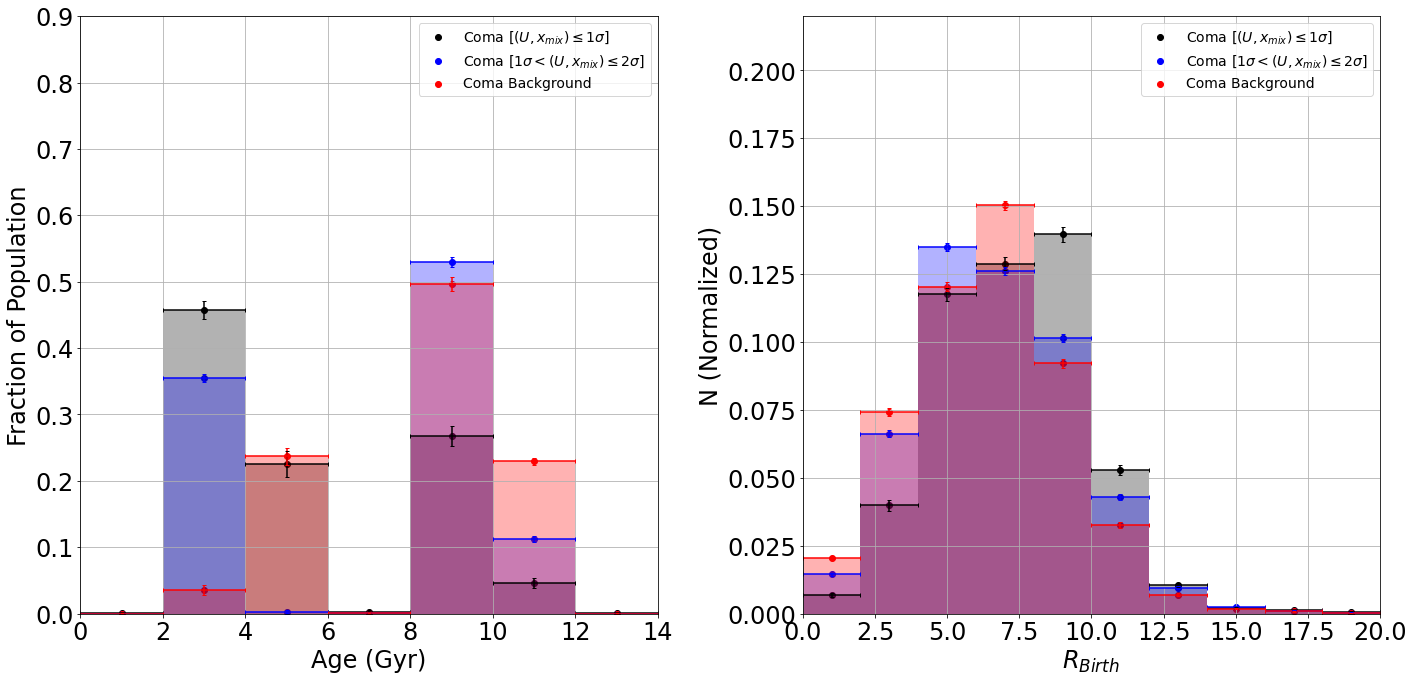

100%|██████████| 10000/10000 [02:07<00:00, 78.32it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:31<00:00, 66.21it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:39<00:00, 62.72it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



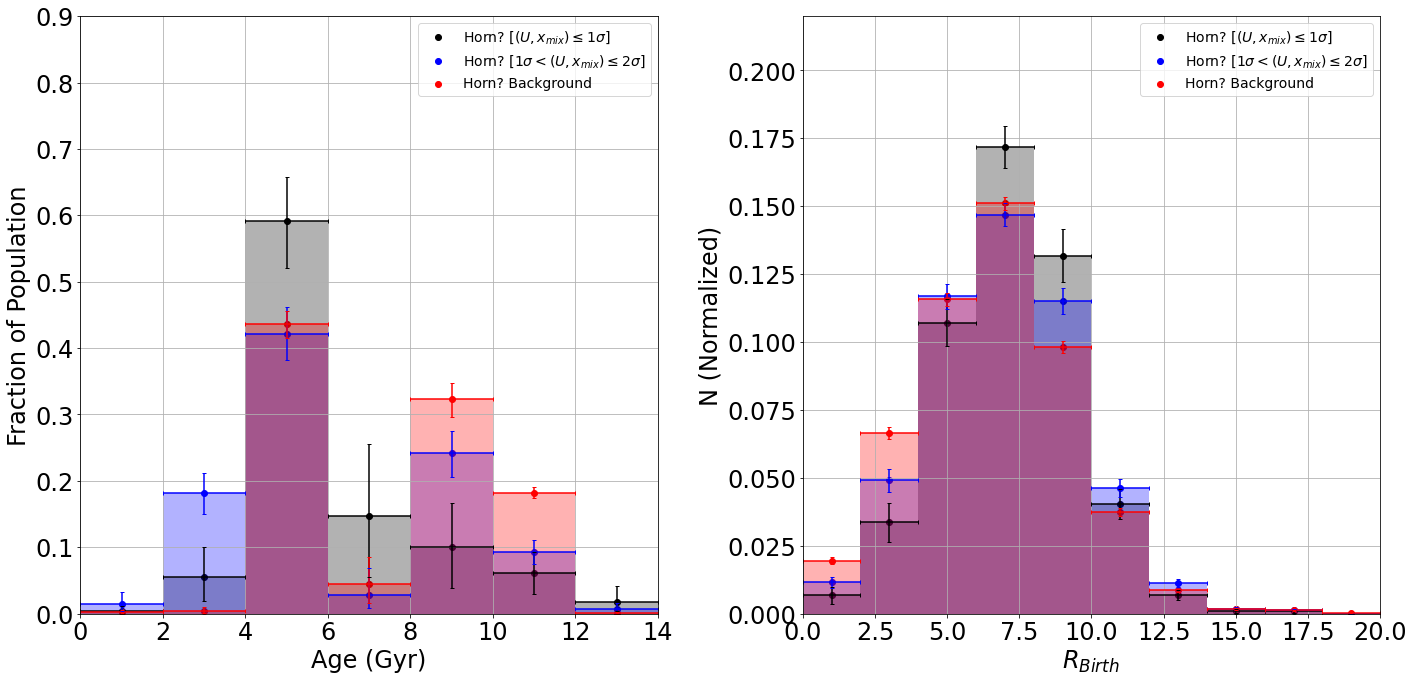

100%|██████████| 10000/10000 [02:06<00:00, 78.94it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:04<00:00, 80.42it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:53<00:00, 57.59it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



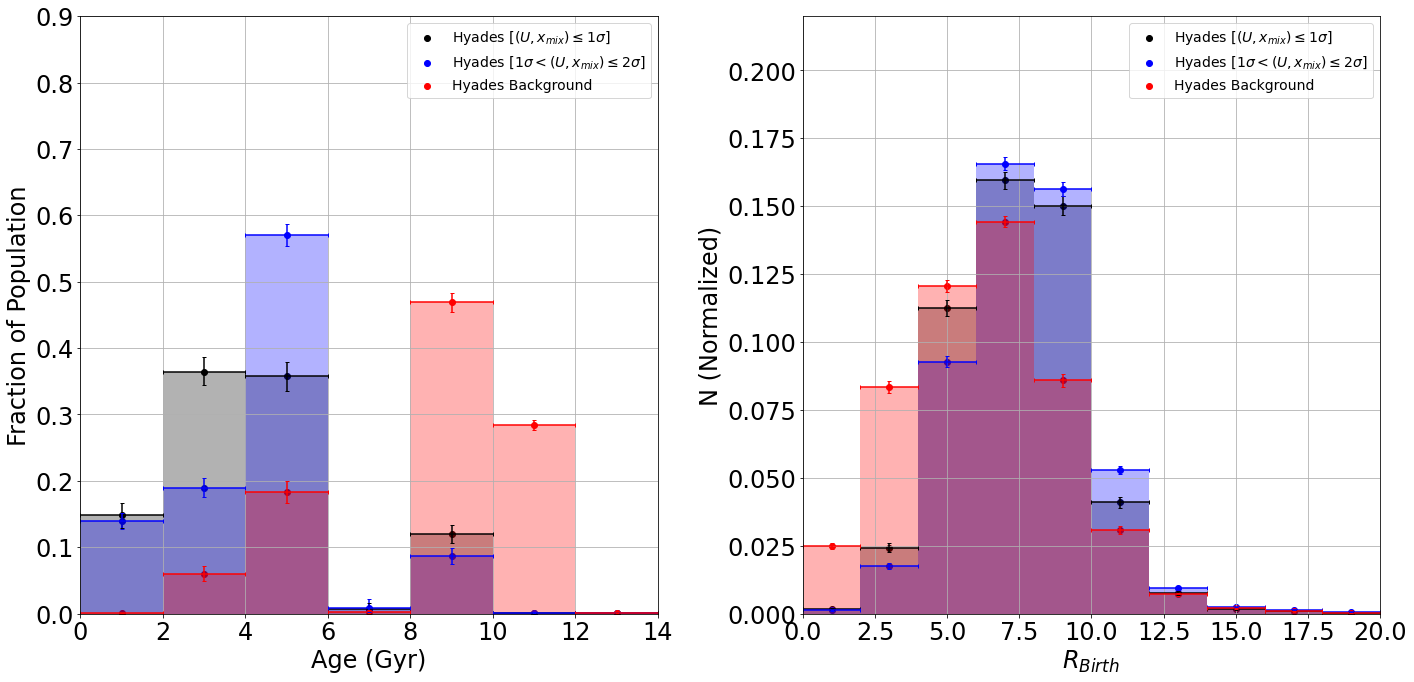

100%|██████████| 10000/10000 [02:47<00:00, 59.88it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:05<00:00, 79.89it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:41<00:00, 62.07it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



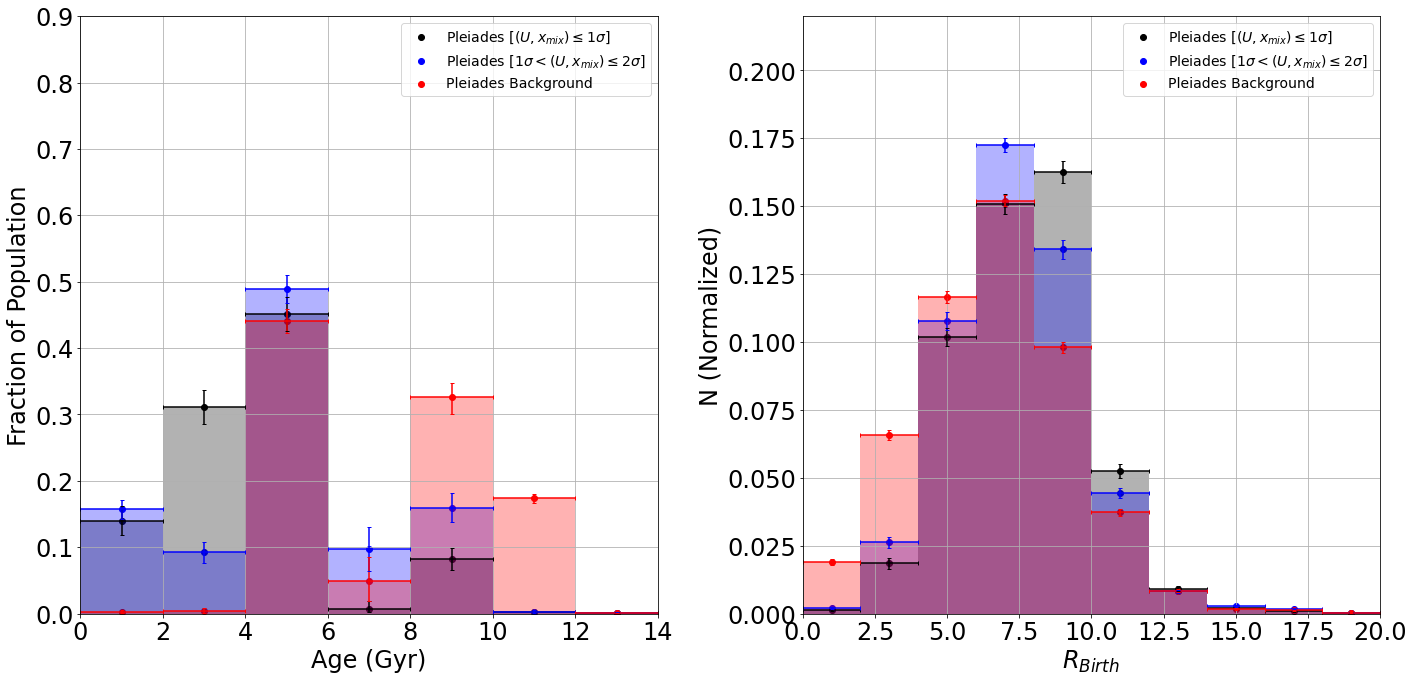

100%|██████████| 10000/10000 [02:27<00:00, 67.78it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:03<00:00, 81.18it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:11<00:00, 76.20it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



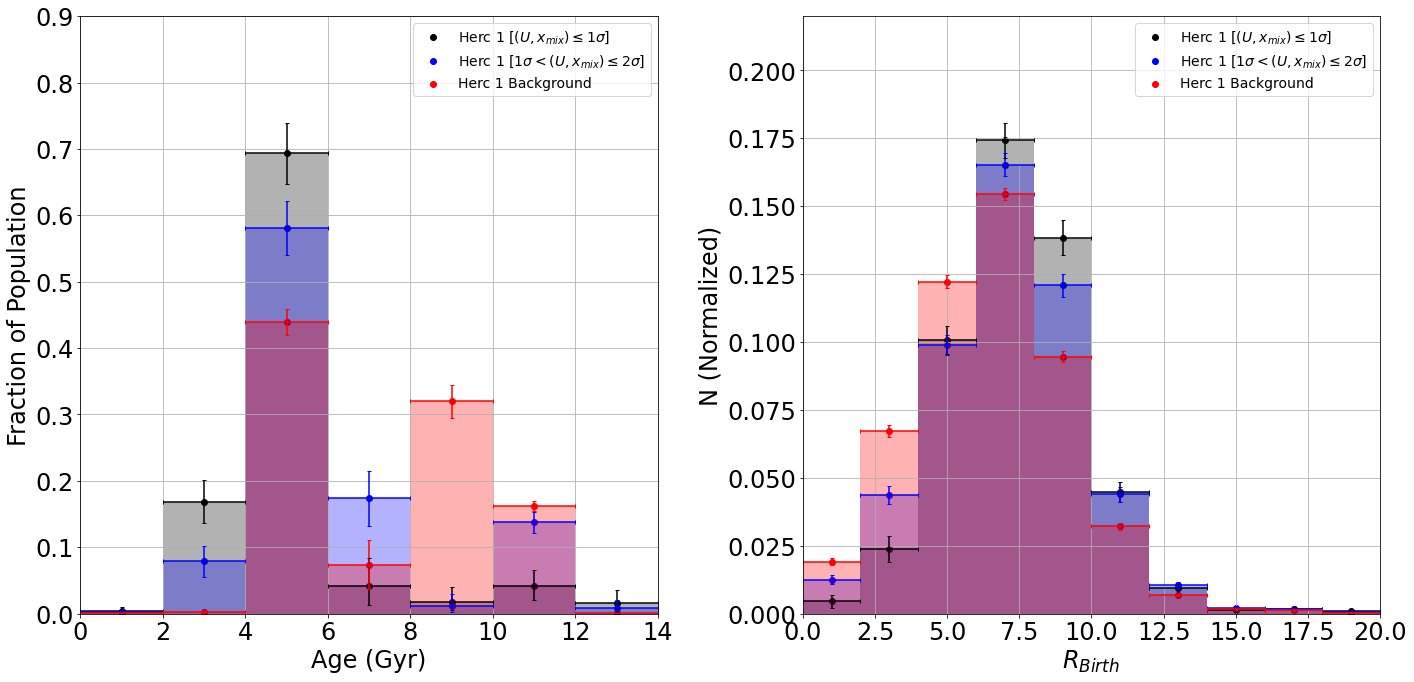

100%|██████████| 10000/10000 [02:07<00:00, 78.41it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:01<00:00, 82.34it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:01<00:00, 82.26it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



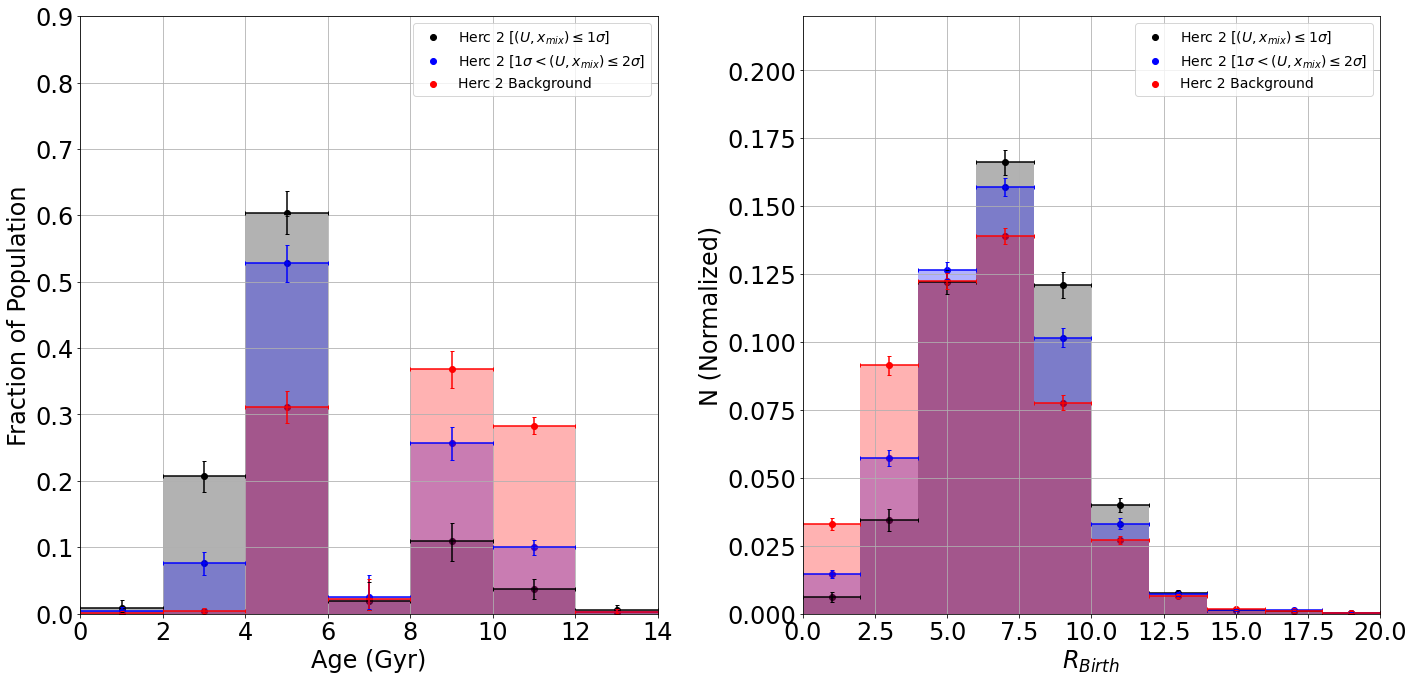

100%|██████████| 10000/10000 [02:32<00:00, 65.45it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:02<00:00, 81.39it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:07<00:00, 78.16it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



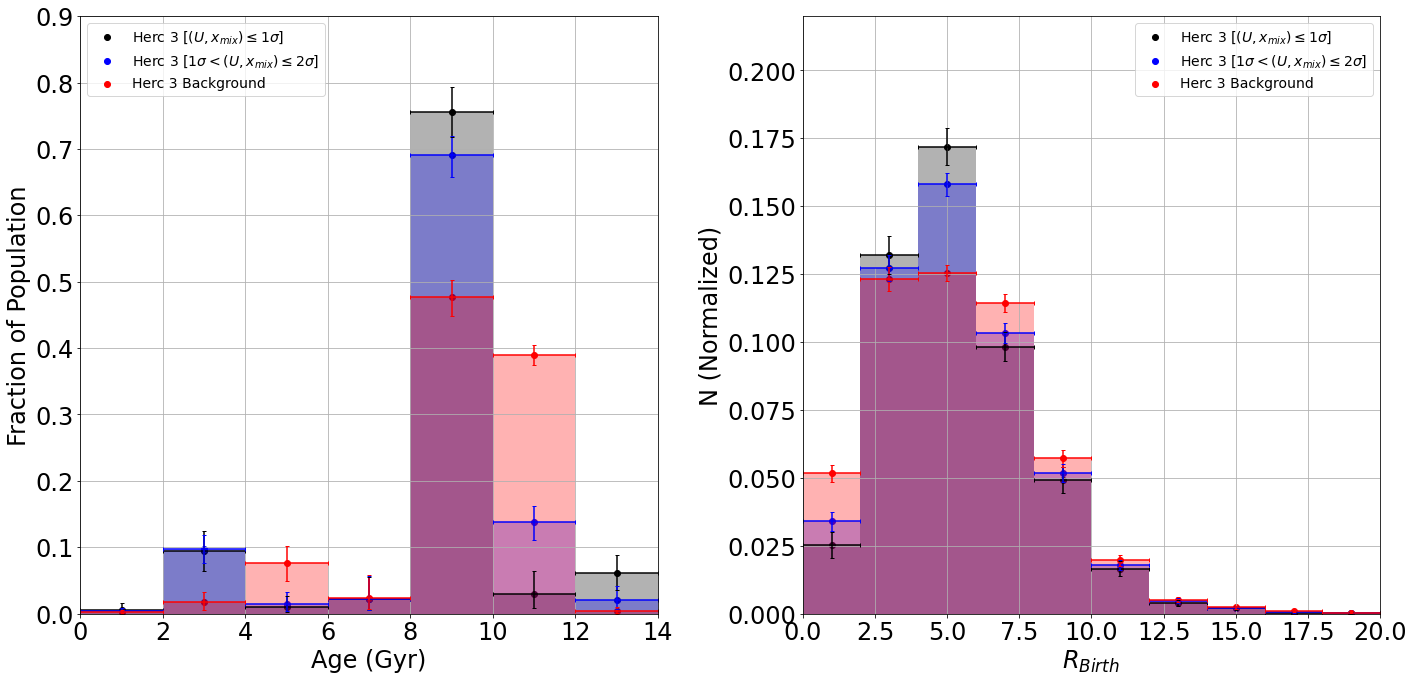

100%|██████████| 10000/10000 [01:59<00:00, 83.72it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:07<00:00, 78.65it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:03<00:00, 80.74it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



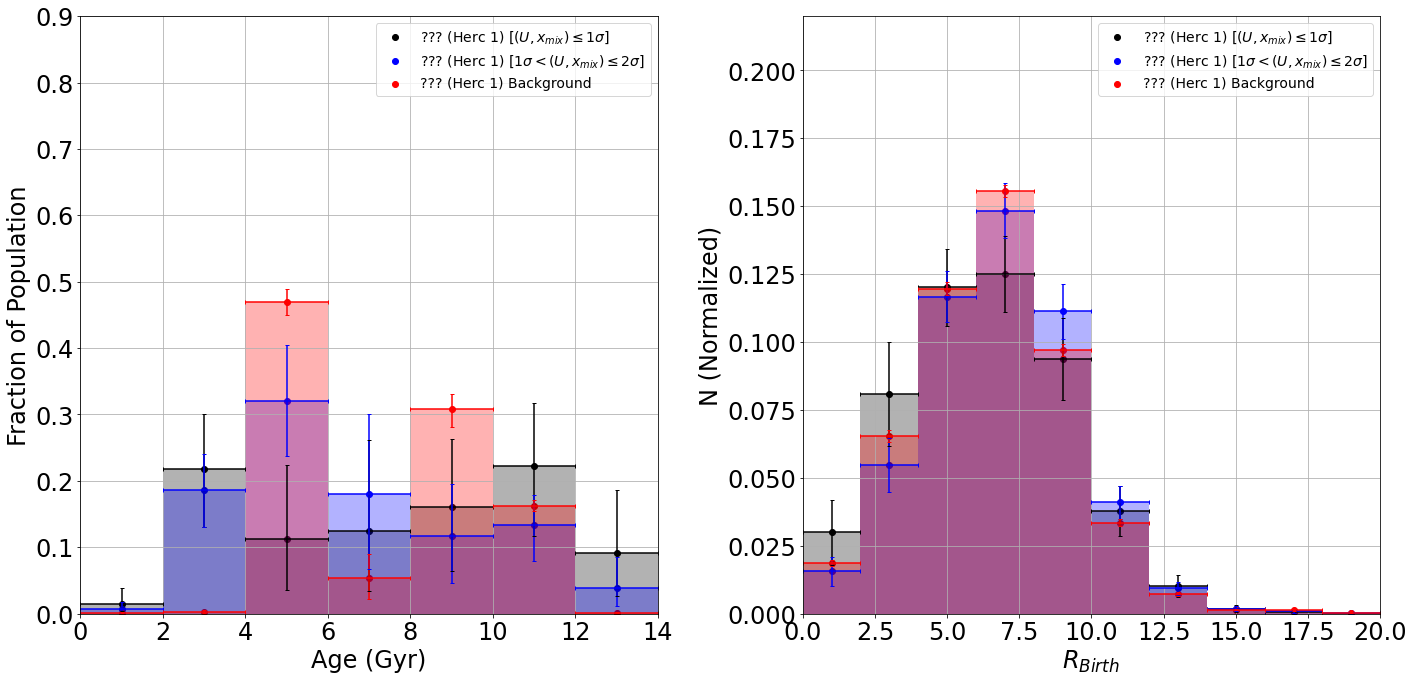

100%|██████████| 10000/10000 [02:30<00:00, 66.30it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [01:58<00:00, 84.50it/s]
N/50 = 200;
tau: [168.82671041 155.16057773 161.30734808 208.51064599 170.6048756
 165.30423911 186.84741745]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



100%|██████████| 10000/10000 [02:02<00:00, 81.82it/s]


/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:828: RuntimeWarning: invalid value encountered in double_scalars
  ft = (1 - t / 12) ** 0.45



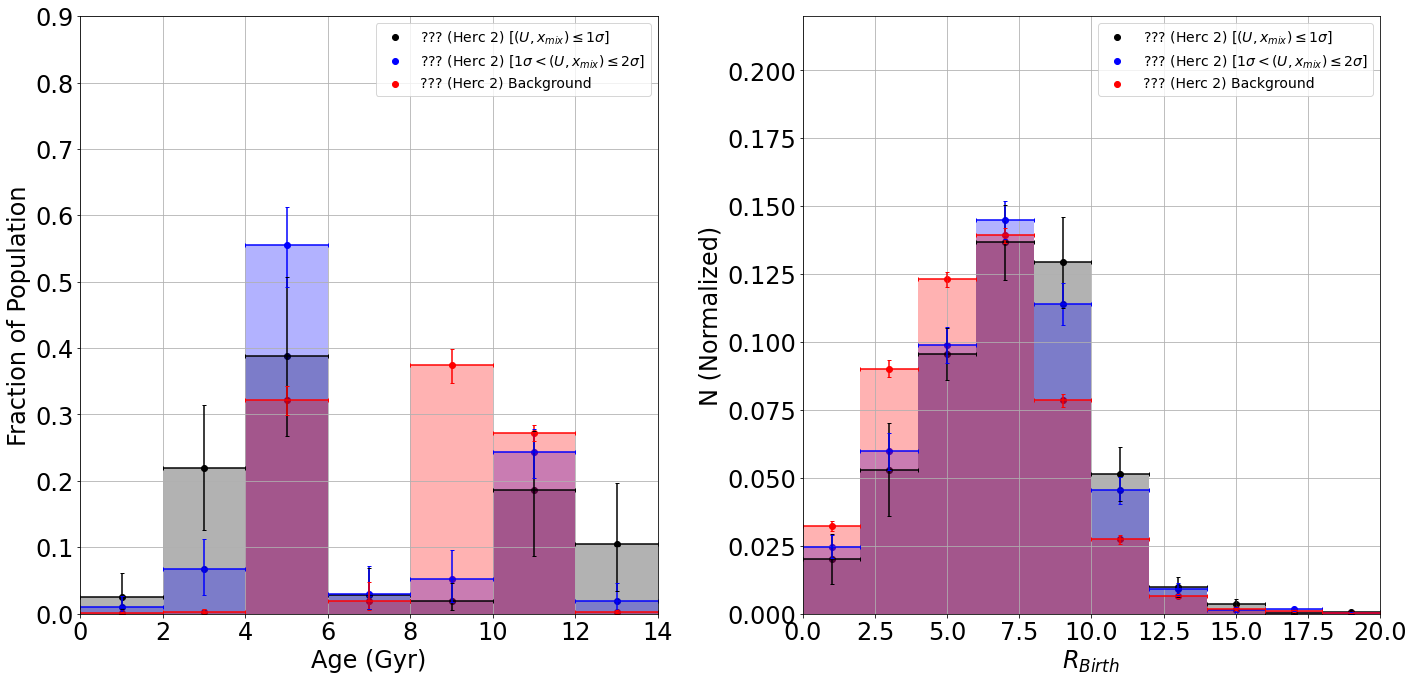

In [14]:
KM.estimate_age_distribution(GM.gms, 'paper_plots', np.arange(0, 16, 2))